<a href="https://colab.research.google.com/github/nishnarudkar/Solar_Radiation_Prediction/blob/main/Solar_radiation_prediction_regression_model_improvised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline

import time



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_name = "/content/drive/MyDrive/G05 Miniproject/New Model-20250212T185614Z-001/New Model/Solar_radiation_regression_.csv"
data = pd.read_csv(f"{file_name}")

data.head(7)

,Site,Latitude,Longitude,Date,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s),Wind Speed at 3m Uncertainty (m/s),...,Standard Deviation DNI (Wh/m2),GHI Uncertainty (Wh/m2),Standard Deviation GHI (Wh/m2),Peak Wind Speed at 3m (m/s),Peak Wind Speed at 3m Uncertainty (m/s),Relative Humidity (%),Relative Humidity Uncertainty (%),Barometric Pressure (mB (hPa equiv)),Barometric Pressure Uncertainty (mB (hPa equiv)),GHI (Wh/m2)
0,Sharurah - TVTC,17.47586,47.08618,01/05/2017 00:00:00,34.5,0.5,50.0,3.7,3.8,0.1,...,1774.2,1520.0,472.4,15.5,0.1,19.9,3.0,926.6,4.6,7400.9
1,Sharurah - TVTC,17.47586,47.08618,01/06/2017 00:00:00,36.3,0.5,38.0,4.0,3.3,0.1,...,2088.1,1527.0,478.6,17.6,0.1,10.1,3.0,923.4,4.6,7412.5
2,Sharurah - TVTC,17.47586,47.08618,01/09/2017 00:00:00,33.9,0.5,49.0,4.0,3.3,0.1,...,1130.9,1342.6,336.5,16.3,0.1,14.3,3.0,925.6,4.6,6528.3
3,Sharurah - TVTC,17.47586,47.08618,01/10/2017 00:00:00,29.2,0.5,42.0,4.0,3.3,0.1,...,869.9,1238.6,253.9,13.6,0.1,17.7,3.0,930.1,4.7,6073.3
4,Sharurah - TVTC,17.47586,47.08618,01/11/2017 00:00:00,24.8,0.5,54.0,4.0,3.5,0.1,...,660.1,1090.7,257.0,11.7,0.1,28.9,3.0,932.6,4.7,5262.7
5,Sharurah - TVTC,17.47586,47.08618,01/03/2018 00:00:00,27.4,0.5,63.0,4.0,3.9,0.1,...,1355.7,1439.6,394.7,17.1,0.1,18.0,3.0,930.4,4.7,7122.5
6,Sharurah - TVTC,17.47586,47.08618,01/04/2018 00:00:00,31.4,0.5,49.0,4.0,4.0,0.1,...,1854.9,1415.4,423.5,17.3,0.1,24.4,3.0,927.5,4.6,6758.0


In [4]:
print(data.columns)


Index(['Site', 'Latitude', 'Longitude', 'Date', 'Air Temperature (C°)',
       'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)',
       'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)',
       'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)'],
      dtype='object')


In [5]:
print(data[['GHI (Wh/m2)', 'DNI (Wh/m2)', 'DHI (Wh/m2)']].head())


   GHI (Wh/m2)  DNI (Wh/m2)  DHI (Wh/m2)
0       7400.9       5908.4       2866.0
1       7412.5       5124.4       3404.4
2       6528.3       6131.6       2007.4
3       6073.3       6975.2       1451.7
4       5262.7       7020.8       1092.0


In [6]:
from sklearn.preprocessing import OneHotEncoder
# 1. One-Hot Encode 'Site'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
site_encoded = encoder.fit_transform(data[['Site']])
site_encoded_df = pd.DataFrame(site_encoded, index=data.index)

# 2. Create X (features) and y (target)
X = data.drop(columns=['GHI (Wh/m2)', 'Site']).reset_index(drop=True)
X = pd.concat([X, site_encoded_df], axis=1)
y = data['GHI (Wh/m2)']

In [7]:
print(data.columns.tolist())  # List all column names

['Site', 'Latitude', 'Longitude', 'Date', 'Air Temperature (C°)', 'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)', 'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)', 'Wind Speed at 3m Uncertainty (m/s)', 'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)', 'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)', 'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)', 'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)', 'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)', 'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)', 'Relative Humidity Uncertainty (%)', 'Barometric Pressure (mB (hPa equiv))', 'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)']


In [10]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y %H:%M:%S")
data['Hour'] = data['Date'].dt.hour          # 0-23
data['Day'] = data['Date'].dt.day            # 1-31
data['Month'] = data['Date'].dt.month        # 1-12
data['Year'] = data['Date'].dt.year          # e.g., 2023
data.drop(columns=['Date'], inplace=True)    # Drop original column

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import metrics

def evaluate(y_test, predictions, txt, mdl_name, loc):
    # Ensure y_test and predictions are 1D
    y_test = y_test.ravel()
    predictions = predictions.ravel()

    # Create a DataFrame for plotting
    dd = pd.DataFrame({'Y_test': y_test, 'Predictions': predictions})

    ## Scatter plot
    plt.figure(figsize=(5/2.54, 5/2.54), dpi=300)
    sns.lmplot(data=dd, x="Y_test", y="Predictions", scatter_kws={"color": 'seagreen'},
               fit_reg=False, legend=False)

    # Adjust xlim and ylim to match GHI range
    min_val, max_val = min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())
    plt.xlim(min_val * 0.9, max_val * 1.1)
    plt.ylim(min_val * 0.9, max_val * 1.1)

    # Regression line
    g = sns.regplot(data=dd, x="Y_test", y="Predictions", label='Hi',
                    color=sns.color_palette('bright')[3],
                    scatter=False, truncate=True)

    g.set_xlim(min_val * 0.9, max_val * 1.1)
    g.set_ylim(min_val * 0.9, max_val * 1.1)

    # Set axis labels for GHI prediction
    g.set_xlabel('Measured GHI (Wh/m$^{2}$)', fontsize=14, fontfamily='sans-serif', weight='bold')
    g.set_ylabel('Estimated GHI (Wh/m$^{2}$)', fontsize=14, fontfamily='sans-serif', weight='bold')

    # Regression line calculation
    B1, B0 = np.polyfit(y_test, predictions, 1)

    # Add R² score to the plot
    plt.text(min_val * 1.05, max_val * 0.95, 'R$^2$=' + '{0:0.4f}'.format(metrics.r2_score(y_test, predictions)),
             horizontalalignment='left', fontfamily='sans-serif', size='x-large', color='black', weight='semibold')

    # Save plot
    plt.savefig(mdl_name + '_' + txt + '.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    # Print evaluation metrics
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2:', metrics.r2_score(y_test, predictions))
    print('Pearson correlation:', pearsonr(y_test, predictions)[0])


In [14]:
X.columns = X.columns.astype(str)  # Force all column names to strings
X_train.columns = X_train.columns.astype(str)  # Also ensure train/test sets are consistent
X_test.columns = X_test.columns.astype(str)

In [15]:
X.describe()

,Latitude,Longitude,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s),Wind Speed at 3m Uncertainty (m/s),Wind Speed at 3m (std dev) (m/s),DHI (Wh/m2),...,33,34,35,36,37,38,39,40,41,42
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,23.982825,42.562821,26.728260,0.501092,168.007884,3.542571,2.598241,0.061128,1.534809,2166.138326,...,0.030928,0.028502,0.024864,0.020619,0.015161,0.027896,0.030928,0.030928,0.009096,0.007277
std,3.734313,4.046824,6.606089,0.010394,121.131074,1.209216,1.352179,0.048761,0.727845,670.291130,...,0.173175,0.166453,0.155756,0.142147,0.122229,0.164724,0.173175,0.173175,0.094969,0.085021
min,16.692097,34.930020,8.100000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,865.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.496040,39.541800,21.700000,0.500000,53.000000,3.700000,2.000000,0.000000,1.200000,1640.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.707744,42.098767,27.400000,0.500000,154.000000,4.000000,2.600000,0.100000,1.600000,2103.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.904200,45.957080,32.200000,0.500000,285.000000,4.000000,3.400000,0.100000,1.900000,2665.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.027395,50.188715,39.700000,0.600000,359.000000,4.800000,7.800000,0.100000,4.500000,6394.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature plots

In [16]:
import matplotlib.pyplot as plt
import matplotlib

# Corrected font settings
font = {
    'family': 'DejaVu Sans',  # Matplotlib default, widely supported
    'weight': 'bold',
    'size': 8
}

# Apply font settings globally
matplotlib.rc('font', **font)




In [17]:
print(data.columns)  # Check if 'UNIXTime' is present


Index(['Site', 'Latitude', 'Longitude', 'Air Temperature (C°)',
       'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)',
       'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)',
       'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))', 'GHI (Wh/m2)',
       'Hour', 'Day', 'Month', 'Year'],
      dtype='object')


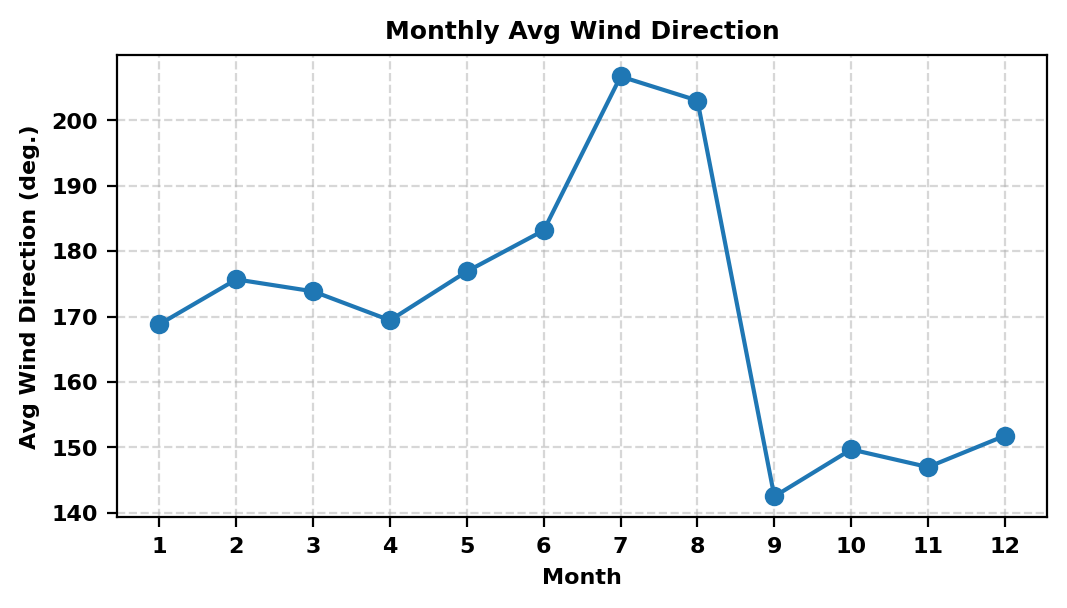

In [19]:
monthly_avg = data.groupby('Month')['Wind Direction at 3m (°N)'].mean()

plt.figure(figsize=(6, 3), dpi=200)
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xticks(ticks=range(1, 13))
plt.ylabel('Avg Wind Direction (deg.)', fontsize=8, fontweight='bold')
plt.xlabel('Month', fontsize=8, fontweight='bold')
plt.title('Monthly Avg Wind Direction', fontsize=9, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('SR_month_vs_WDir_avg.pdf', bbox_inches='tight')
plt.show()


### Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

y = data['GHI (Wh/m2)']  # Define the target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()  # Ensure 'Site' is encoded already


,Latitude,Longitude,Date,Air Temperature (C°),Air Temperature Uncertainty (C°),Wind Direction at 3m (°N),Wind Direction at 3m Uncertainty (°N),Wind Speed at 3m (m/s),Wind Speed at 3m Uncertainty (m/s),Wind Speed at 3m (std dev) (m/s),...,33,34,35,36,37,38,39,40,41,42
584,24.72359,46.61639,01/11/2021 00:00:00,23.7,0.5,307.0,4.0,1.5,0.0,0.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,22.27948,46.73319,01/04/2019 00:00:00,27.4,0.5,57.0,4.0,2.4,0.1,1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,17.63228,44.53735,01/12/2018 00:00:00,19.9,0.5,90.0,3.7,1.8,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,21.49604,39.24492,01/10/2020 00:00:00,32.3,0.5,317.0,4.0,2.3,0.0,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,26.90420,49.76274,01/10/2017 00:00:00,29.9,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(X_train.columns)


Index(['Latitude', 'Longitude', 'Date', 'Air Temperature (C°)',
       'Air Temperature Uncertainty (C°)', 'Wind Direction at 3m (°N)',
       'Wind Direction at 3m Uncertainty (°N)', 'Wind Speed at 3m (m/s)',
       'Wind Speed at 3m Uncertainty (m/s)',
       'Wind Speed at 3m (std dev) (m/s)', 'DHI (Wh/m2)',
       'DHI Uncertainty (Wh/m2)', 'Standard Deviation DHI (Wh/m2)',
       'DNI (Wh/m2)', 'DNI Uncertainty (Wh/m2)',
       'Standard Deviation DNI (Wh/m2)', 'GHI Uncertainty (Wh/m2)',
       'Standard Deviation GHI (Wh/m2)', 'Peak Wind Speed at 3m (m/s)',
       'Peak Wind Speed at 3m Uncertainty (m/s)', 'Relative Humidity (%)',
       'Relative Humidity Uncertainty (%)',
       'Barometric Pressure (mB (hPa equiv))',
       'Barometric Pressure Uncertainty (mB (hPa equiv))', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '3

In [25]:
X.columns = X.columns.astype(str)  # Convert all column names to strings


In [26]:
print(X_train.dtypes)
print(X_test.dtypes)


Latitude                            float64
Longitude                           float64
Date                                 object
Air Temperature (C°)                float64
Air Temperature Uncertainty (C°)    float64
                                     ...   
38                                  float64
39                                  float64
40                                  float64
41                                  float64
42                                  float64
Length: 67, dtype: object
Latitude                            float64
Longitude                           float64
Date                                 object
Air Temperature (C°)                float64
Air Temperature Uncertainty (C°)    float64
                                     ...   
38                                  float64
39                                  float64
40                                  float64
41                                  float64
42                                  float64
Length

In [28]:
# Drop non-numeric columns (like datetime strings)
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R² Score:", r2_score(y_test, predictions))

MAE: 120.13665887729383
MSE: 30774.04981777428
RMSE: 175.4253397254065
R² Score: 0.979853874201271


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

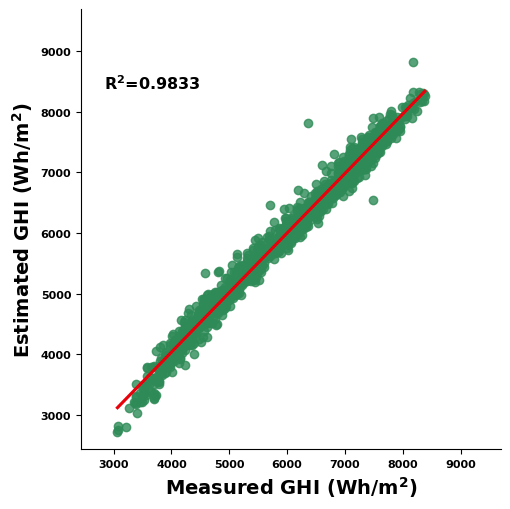

MAE: 121.01289568829286
MSE: 26480.158584116798
RMSE: 162.7272521248878
R^2: 0.9832663006135948
Pearson correlation: 0.9915978522635046


In [31]:
predictions = model.predict(X_train)
evaluate(y_train, predictions, 'Training data', 'LR', loc=(1.3, 1.09, 33))



In [32]:
from sklearn.linear_model import LinearRegression
import time

# Initialize model
lm = LinearRegression()

# Measure training time
start_train_time = time.time()
lm.fit(X_train, y_train)
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Print results
print(f"Training time: {train_time:.4f} seconds")


Training time: 0.2836 seconds


In [33]:
# Check your data ranges first
print("y range:", min(y.values[:100]), max(y.values[:100]))
print("predictions range:", min(predictions[:100]), max(predictions[:100]))

y range: 4327.0 7908.5
predictions range: 3200.8247884895763 7902.253631523696


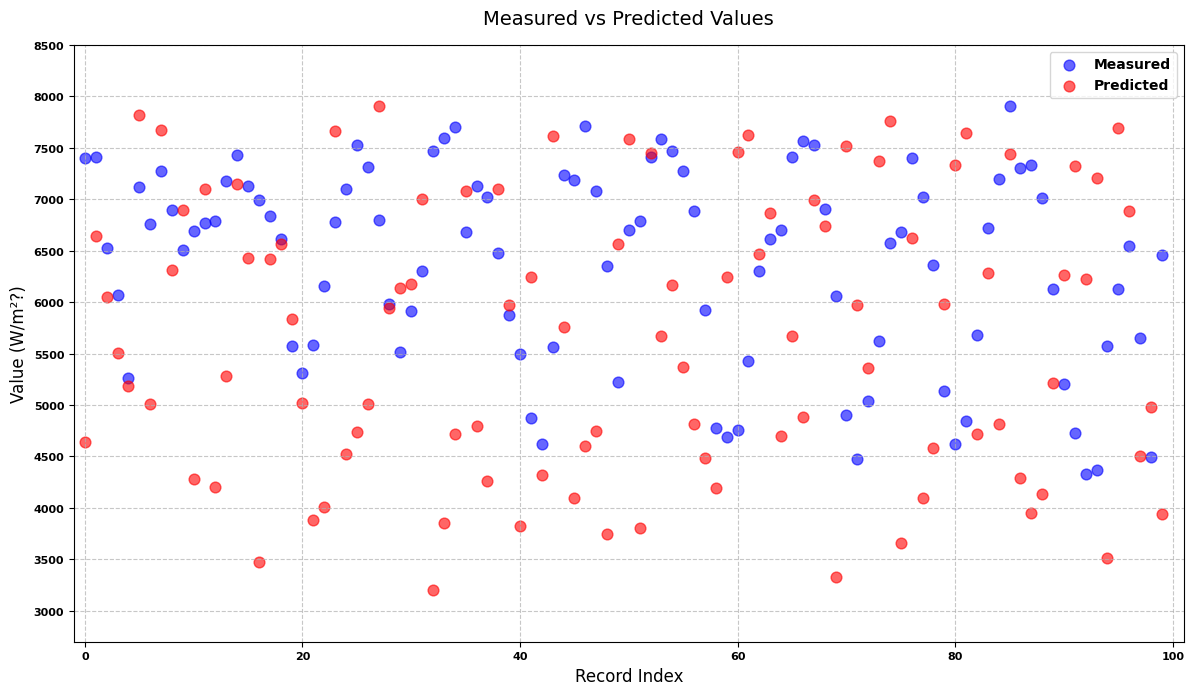

y range: 4327.0 7908.5
predictions range: 3200.8247884895763 7902.253631523696


In [34]:

# Create figure
plt.figure(figsize=(12, 7), dpi=100)

# Plot data
plt.scatter(range(100), y.values[:100],
            c='blue',
            alpha=0.6,
            s=60,
            label='Measured')
plt.scatter(range(100), predictions[:100],
            c='red',
            alpha=0.6,
            s=60,
            label='Predicted')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Labels and title
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('Measured vs Predicted Values', fontsize=14, pad=15)

# Set limits
plt.xlim(-1, 101)

# Custom y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)

# Y-axis ticks
plt.yticks(np.arange(3000, 9000, 500))

# Legend
plt.legend(fontsize=10, loc='best')

plt.tight_layout()

# Save the plot - you can change the filename and format
plt.savefig('LR_Training_Time.pdf',
            dpi=300,           # Higher DPI for better quality
            bbox_inches='tight',# Ensures all labels are included
            format='pdf')      # Can also use 'jpg', 'pdf', etc.

# Display the plot
plt.show()

# Print ranges
print("y range:", min(y.values[:100]), max(y.values[:100]))
print("predictions range:", min(predictions[:100]), max(predictions[:100]))

Testing time: 0.0020232200622558594 sec


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

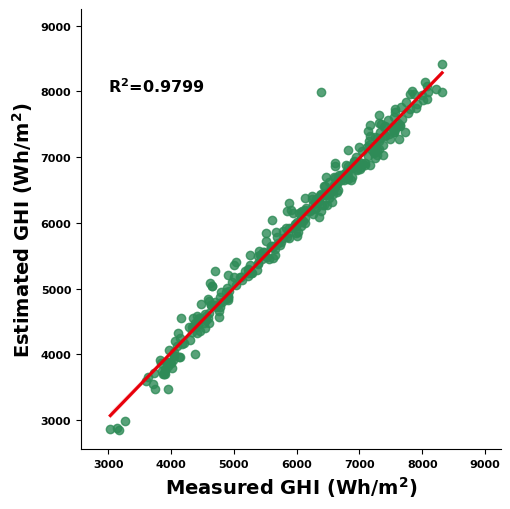

MAE: 120.13665887729383
MSE: 30774.04981777428
RMSE: 175.4253397254065
R^2: 0.979853874201271
Pearson correlation: 0.9898979633316114


In [35]:
t1 = time.time()
predictions = model.predict(X_test)
print('Testing time: {} sec'.format(time.time() -t1))

evaluate(y_test, predictions, 'Testing data', 'LR', loc=(1.3, 1.09, 33))

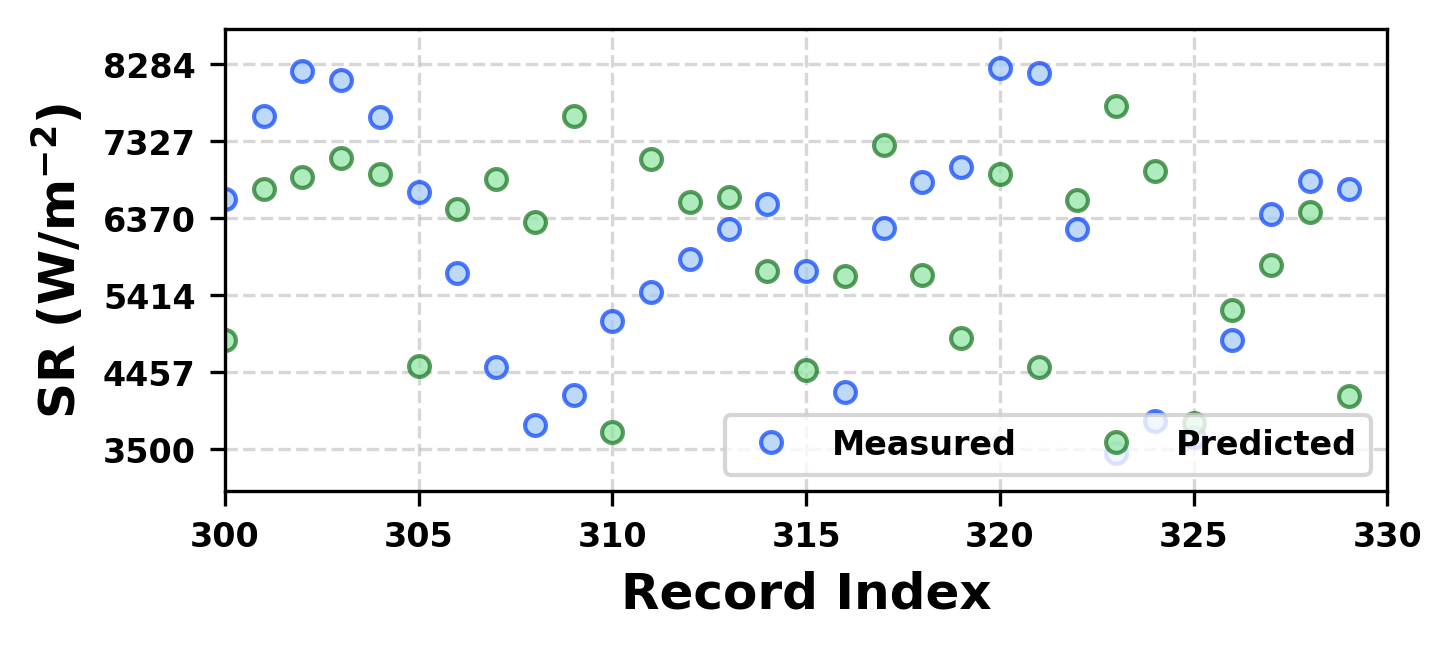

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3715.178134676541 7760.141452296438


In [36]:


# Create figure
f = plt.figure(figsize=(5, 2), dpi=300)

# Get the valid range based on shorter array
n_samples = min(len(y.values[300:400]), len(predictions[300:400]))
x_range = range(300, 300 + n_samples)

# Calculate min and max for y-limits using actual available data
y_min = min(min(y.values[300:300 + n_samples]), min(predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

# Plot with adjusted ranges
plt.plot(x_range, y.values[300:300 + n_samples],
         linewidth=0,
         marker='o',
         markersize=5,
         markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0],
         alpha=0.7,
         label='Measured')

plt.plot(x_range, predictions[300:300 + n_samples],
         linewidth=0,
         marker='o',
         markersize=5,
         markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2],
         alpha=0.7,
         label='Predicted')

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Labels
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

# Set limits
plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

# Dynamic y-ticks
tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

# Save
plt.savefig('LR_Testing_Time.pdf',
            bbox_inches='tight',
            dpi=300,
            format='pdf')

plt.show()

# Diagnostic prints
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(predictions[300:300 + n_samples]), max(predictions[300:300 + n_samples]))

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize Linear Regression model
lm_cv = LinearRegression()

# Perform 10-fold cross-validation with multiple metrics
scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

scores = cross_validate(lm_cv, X_train, y_train,
                       cv=10,
                       scoring=scoring_metrics,
                       return_train_score=True)  # Added to compare train vs test

# Calculate RMSE from MSE
rmse_scores = np.sqrt(-scores['test_mse'])

# Print results with better formatting
print("\n=== 10-Fold Cross-Validation Results ===")
print(f"Mean Absolute Error (MAE):  "
      f"{-scores['test_mae'].mean():.6f} ± {scores['test_mae'].std():.6f}")
print(f"Mean Squared Error (MSE):   "
      f"{-scores['test_mse'].mean():.6f} ± {scores['test_mse'].std():.6f}")
print(f"Root Mean Squared Error (RMSE): "
      f"{rmse_scores.mean():.6f} ± {rmse_scores.std():.6f}")
print(f"R-squared (R²):            "
      f"{scores['test_r2'].mean():.6f} ± {scores['test_r2'].std():.6f}")




=== 10-Fold Cross-Validation Results ===
Mean Absolute Error (MAE):  128.686937 ± 10.982527
Mean Squared Error (MSE):   35046.505789 ± 18633.149742
Root Mean Squared Error (RMSE): 182.317840 ± 42.505424
R-squared (R²):            0.977024 ± 0.013871


In [38]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')



['linear_regression_model.pkl']

RF

**Initialize & Train Model**

Training time: 5.5212 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

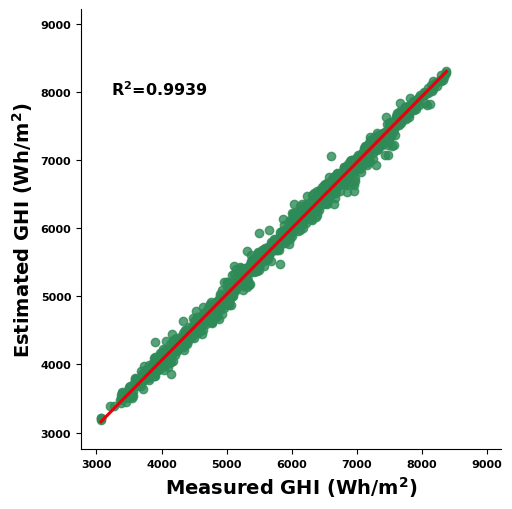

MAE: 74.26871304354383
MSE: 9716.331204309712
RMSE: 98.57145227858679
R^2: 0.9938599247812212
Pearson correlation: 0.9972887479558852


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

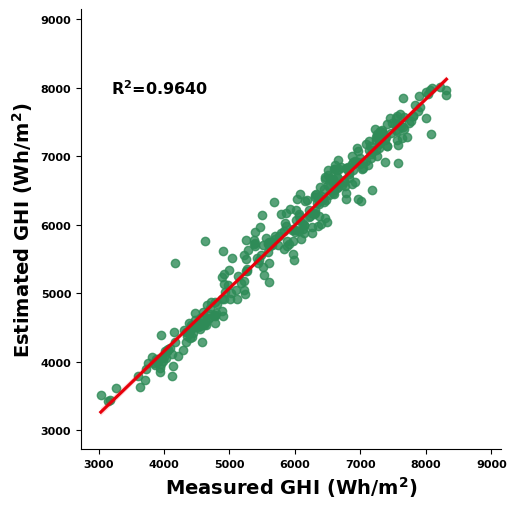

MAE: 168.84872873650588
MSE: 54942.379438013966
RMSE: 234.39790834820596
R^2: 0.9640321603950733
Pearson correlation: 0.9830101595520655


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Ensure columns are strings (if not already done)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Prevent overfitting
    random_state=42    # Reproducibility
)

# Measure training time
start_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'RF', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'RF', loc=(1.3, 1.09, 33))

plt.show()


In [40]:
# Predict on Test Set
t1 = time.time()
rf_predictions = rf_model.predict(X_test)
print('Testing time: {:.4f} sec'.format(time.time() - t1))

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("R² Score:", r2_score(y_test, rf_predictions))


Testing time: 0.0214 sec
MAE: 168.84872873650588
MSE: 54942.379438013966
RMSE: 234.39790834820596
R² Score: 0.9640321603950733


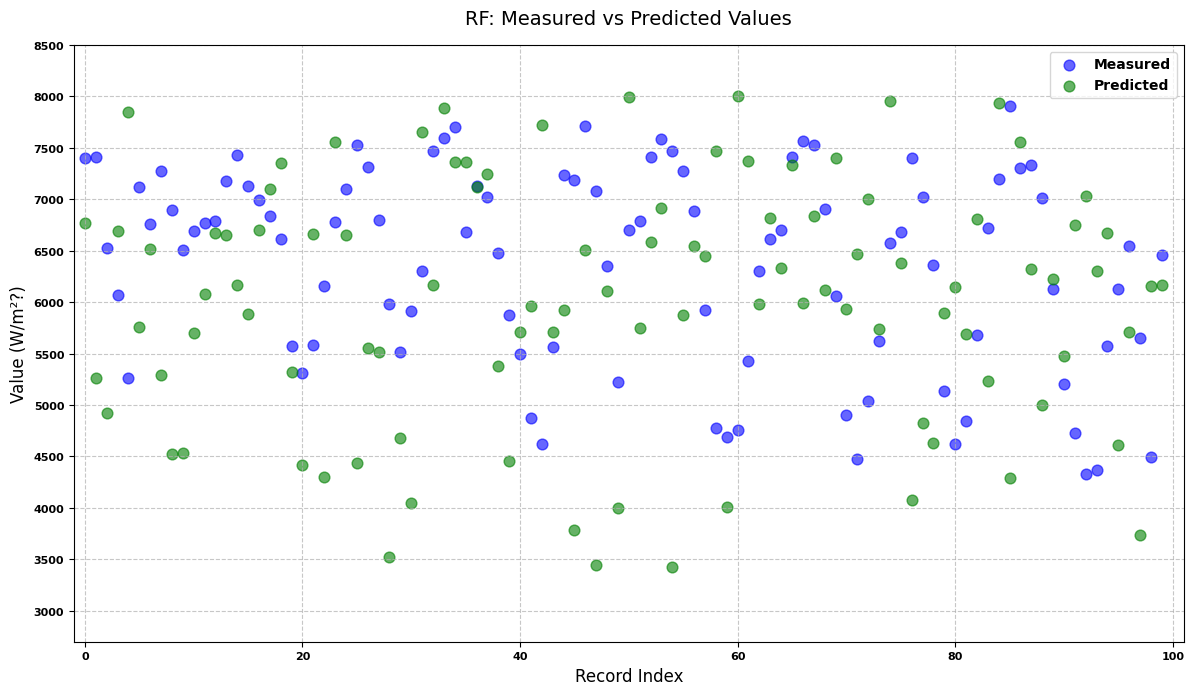

In [41]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), rf_predictions[:100], c='green', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('RF: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

# Custom y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('RF_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()


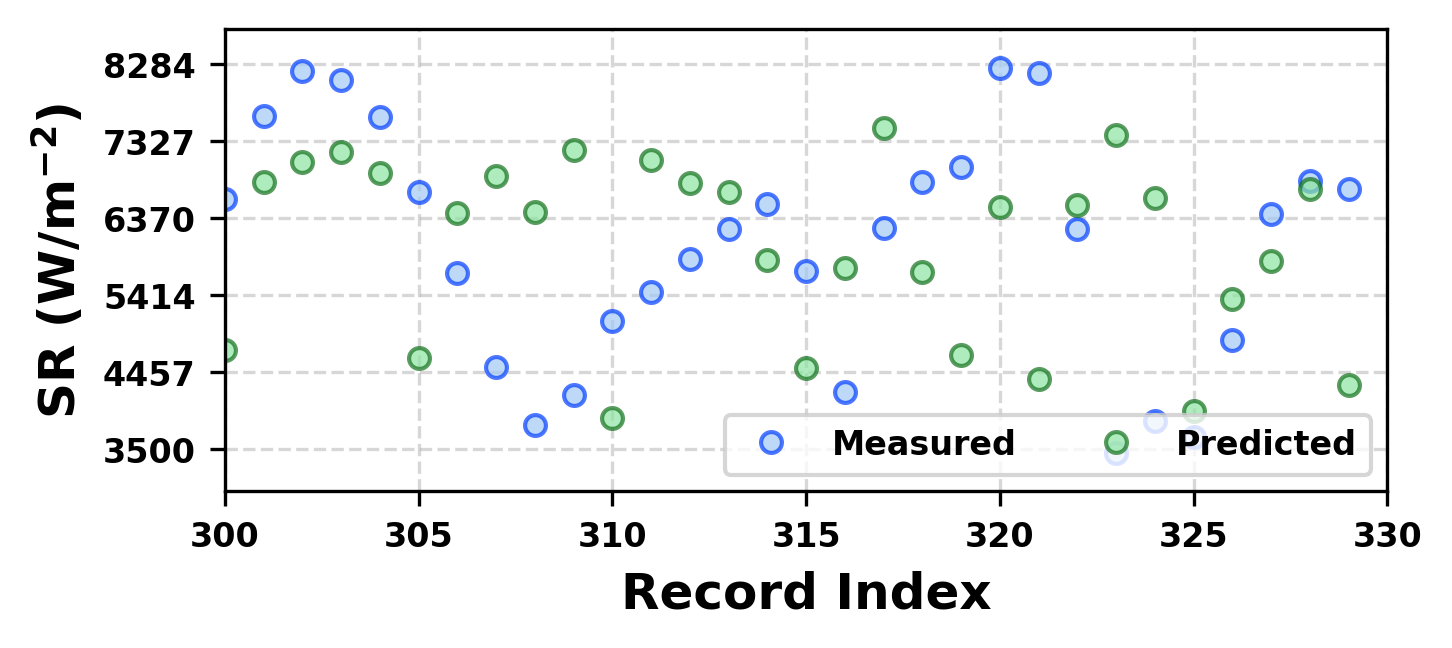

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3888.9217075810366 7482.344595257662


In [42]:
f = plt.figure(figsize=(5, 2), dpi=300)

n_samples = min(len(y.values[300:400]), len(rf_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(rf_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(rf_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, rf_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('RF_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(rf_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(rf_predictions[300:300 + n_samples]), max(rf_predictions[300:300 + n_samples]))


In [43]:
rf_cv_model = RandomForestRegressor(n_estimators=100, random_state=42)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

rf_scores = cross_validate(rf_cv_model, X_train, y_train,
                           cv=10,
                           scoring=scoring_metrics,
                           return_train_score=True)

rf_rmse_scores = np.sqrt(-rf_scores['test_mse'])

print("\n=== Random Forest 10-Fold CV Results ===")
print(f"MAE:  {-rf_scores['test_mae'].mean():.6f} ± {rf_scores['test_mae'].std():.6f}")
print(f"MSE:  {-rf_scores['test_mse'].mean():.6f} ± {rf_scores['test_mse'].std():.6f}")
print(f"RMSE: {rf_rmse_scores.mean():.6f} ± {rf_rmse_scores.std():.6f}")
print(f"R²:   {rf_scores['test_r2'].mean():.6f} ± {rf_scores['test_r2'].std():.6f}")



=== Random Forest 10-Fold CV Results ===
MAE:  170.266875 ± 24.629977
MSE:  55289.944819 ± 16973.876078
RMSE: 232.583954 ± 34.563698
R²:   0.964061 ± 0.012424


In [44]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_regression_model.pkl')



['random_forest_regression_model.pkl']

Decision Tree


Initialization and Model Training


Training time: 0.0521 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

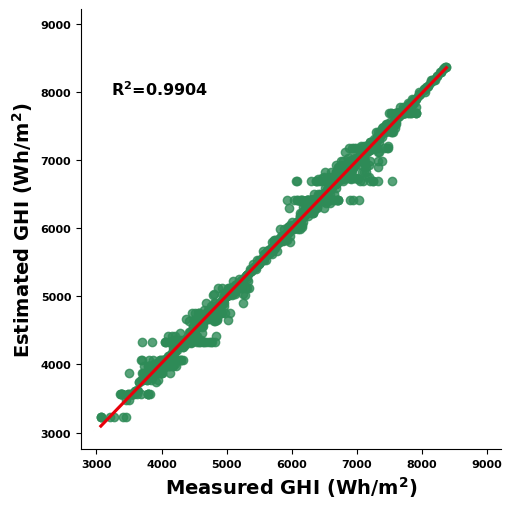

MAE: 72.98946967351543
MSE: 15222.291434093542
RMSE: 123.37865064140368
R^2: 0.9903805240432676
Pearson correlation: 0.9951786392619506


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

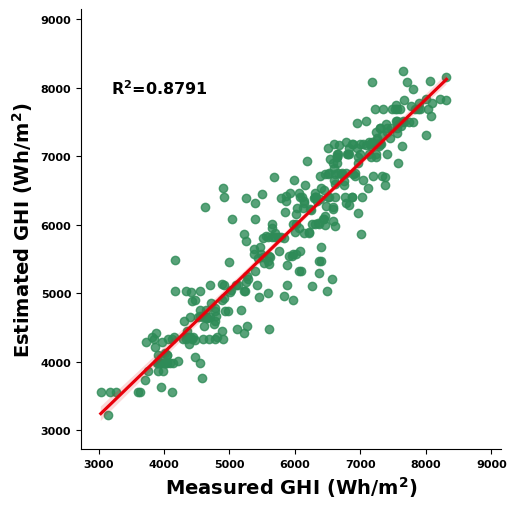

MAE: 308.25215171029146
MSE: 184618.7787663024
RMSE: 429.67287413368604
R^2: 0.8791399518796698
Pearson correlation: 0.9387454398537189
Testing time: 0.0023 sec
MAE: 308.25215171029146
MSE: 184618.7787663024
RMSE: 429.67287413368604
R² Score: 0.8791399518796698


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure columns are strings (same as RF)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize Decision Tree (similar to RF, but single tree)
dt_model = DecisionTreeRegressor(
    max_depth=10,      # Control overfitting like RF
    random_state=42    # Reproducibility
)

# Measure training time
start_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = dt_model.predict(X_train)
test_predictions = dt_model.predict(X_test)

# Evaluate using same custom function
evaluate(y_train, train_predictions, 'Training_data', 'DT', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'DT', loc=(1.3, 1.09, 33))

plt.show()

# Predict on Test Set with timing
t1 = time.time()
dt_predictions = dt_model.predict(X_test)
print('Testing time: {:.4f} sec'.format(time.time() - t1))

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, dt_predictions))
print("MSE:", mean_squared_error(y_test, dt_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_predictions)))
print("R² Score:", r2_score(y_test, dt_predictions))


Measured vs Predicted Scatter

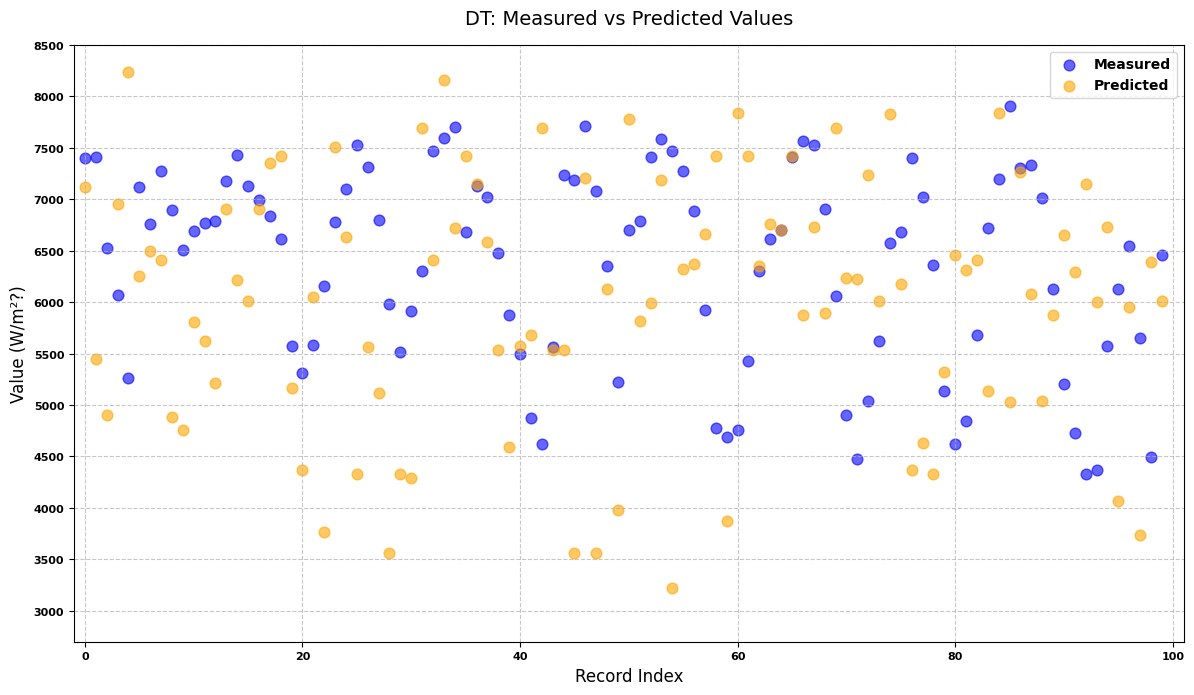

In [46]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), dt_predictions[:100], c='orange', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('DT: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

# Y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('DT_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()


 Range-Based Testing

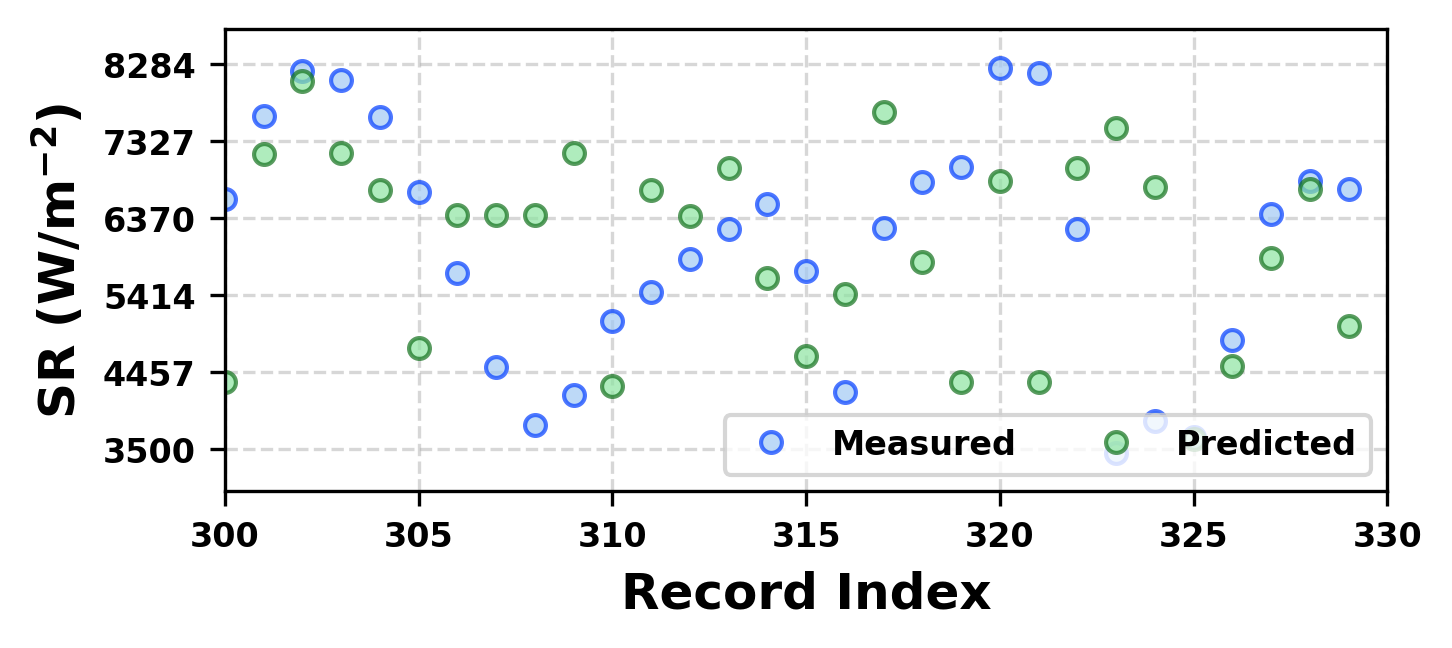

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3625.7 8075.8


In [47]:
f = plt.figure(figsize=(5, 2), dpi=300)

n_samples = min(len(y.values[300:400]), len(dt_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(dt_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(dt_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, dt_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('DT_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(dt_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(dt_predictions[300:300 + n_samples]), max(dt_predictions[300:300 + n_samples]))


Cross Validation

In [48]:
dt_cv_model = DecisionTreeRegressor(max_depth=10, random_state=42)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

dt_scores = cross_validate(dt_cv_model, X_train, y_train,
                           cv=10,
                           scoring=scoring_metrics,
                           return_train_score=True)

dt_rmse_scores = np.sqrt(-dt_scores['test_mse'])

print("\n=== Decision Tree 10-Fold CV Results ===")
print(f"MAE:  {-dt_scores['test_mae'].mean():.6f} ± {dt_scores['test_mae'].std():.6f}")
print(f"MSE:  {-dt_scores['test_mse'].mean():.6f} ± {dt_scores['test_mse'].std():.6f}")
print(f"RMSE: {dt_rmse_scores.mean():.6f} ± {dt_rmse_scores.std():.6f}")
print(f"R²:   {dt_scores['test_r2'].mean():.6f} ± {dt_scores['test_r2'].std():.6f}")



=== Decision Tree 10-Fold CV Results ===
MAE:  309.767462 ± 40.454322
MSE:  200800.602069 ± 55441.820639
RMSE: 443.589926 ± 63.471096
R²:   0.872841 ± 0.030845


In [53]:
import joblib

# Save the trained model
joblib.dump(model, 'decision_tree_regression_model.pkl')



['decision_tree_regression_model.pkl']

KNN

Initialization and Model Training


Training time: 0.0078 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

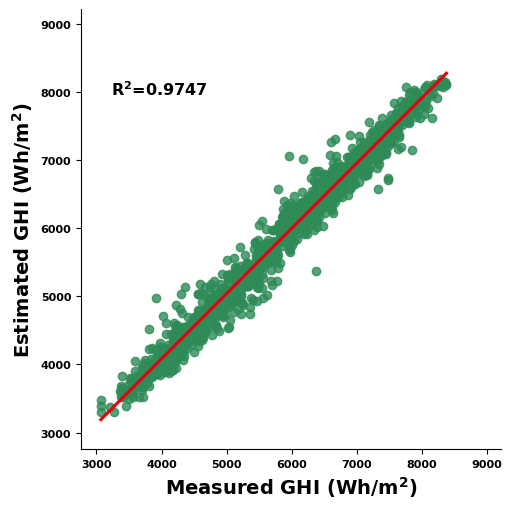

MAE: 146.66746019711906
MSE: 40107.75659469296
RMSE: 200.26921030126664
R^2: 0.9746545648589404
Pearson correlation: 0.9874127374241786


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

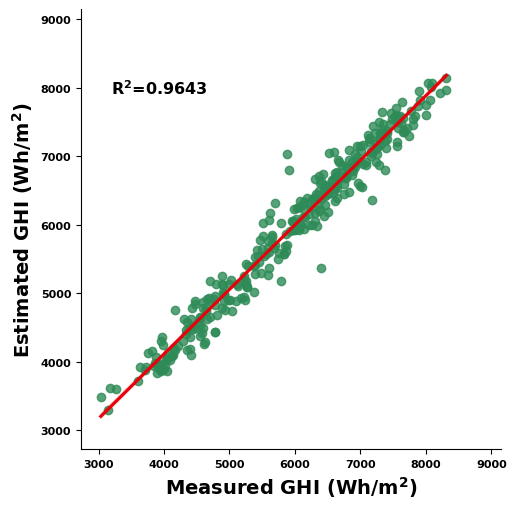

MAE: 172.9815757575758
MSE: 54600.234700606066
RMSE: 233.66693112335358
R^2: 0.9642561442698642
Pearson correlation: 0.9822472081548498
Testing time: 0.0119 sec
MAE: 172.9815757575758
MSE: 54600.234700606066
RMSE: 233.66693112335358
R² Score: 0.9642561442698642


In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure columns are strings (same as RF/DT)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(
    n_neighbors=5,   # Default = 5, can be tuned later
    weights='uniform',  # Or 'distance' for weighted votes
    metric='minkowski',  # Default distance (Euclidean)
    p=2              # p=2 => Euclidean distance
)

# Measure training time (KNN does no actual training, but we keep for consistency)
start_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'KNN', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'KNN', loc=(1.3, 1.09, 33))

plt.show()

# Predict on Test Set with timing
t1 = time.time()
knn_predictions = knn_model.predict(X_test)
print('Testing time: {:.4f} sec'.format(time.time() - t1))

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, knn_predictions))
print("MSE:", mean_squared_error(y_test, knn_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("R² Score:", r2_score(y_test, knn_predictions))


 Measured vs Predicted Scatter Plot

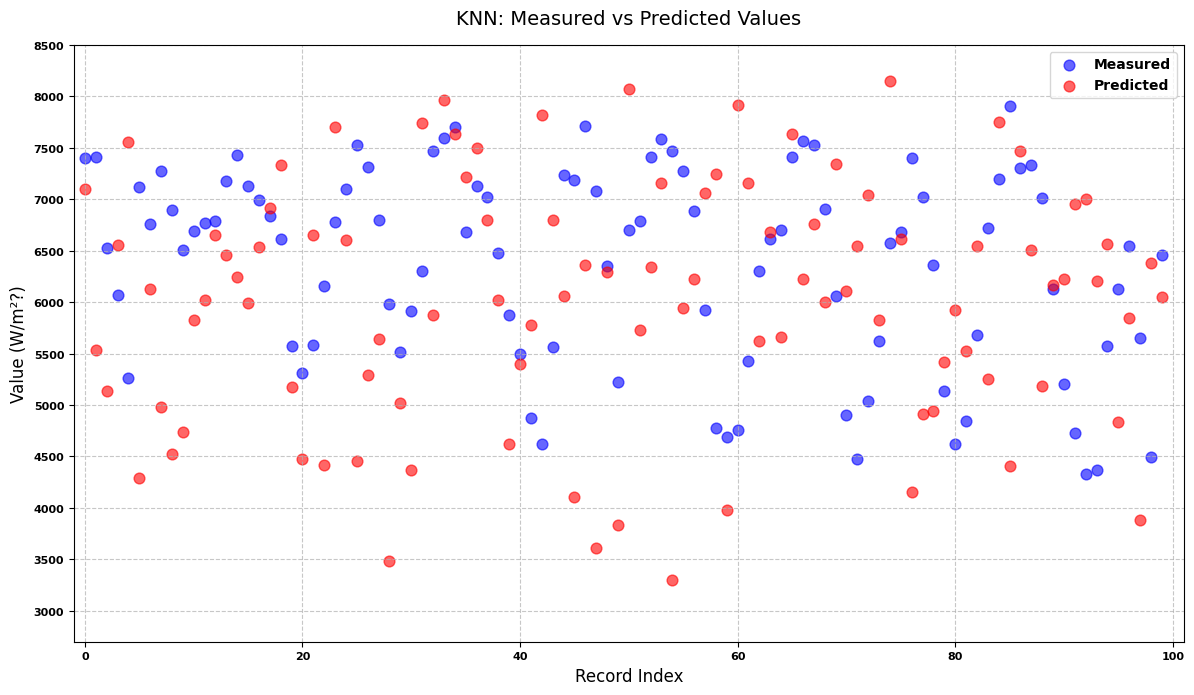

In [50]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), knn_predictions[:100], c='red', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('KNN: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

# Y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('KNN_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()


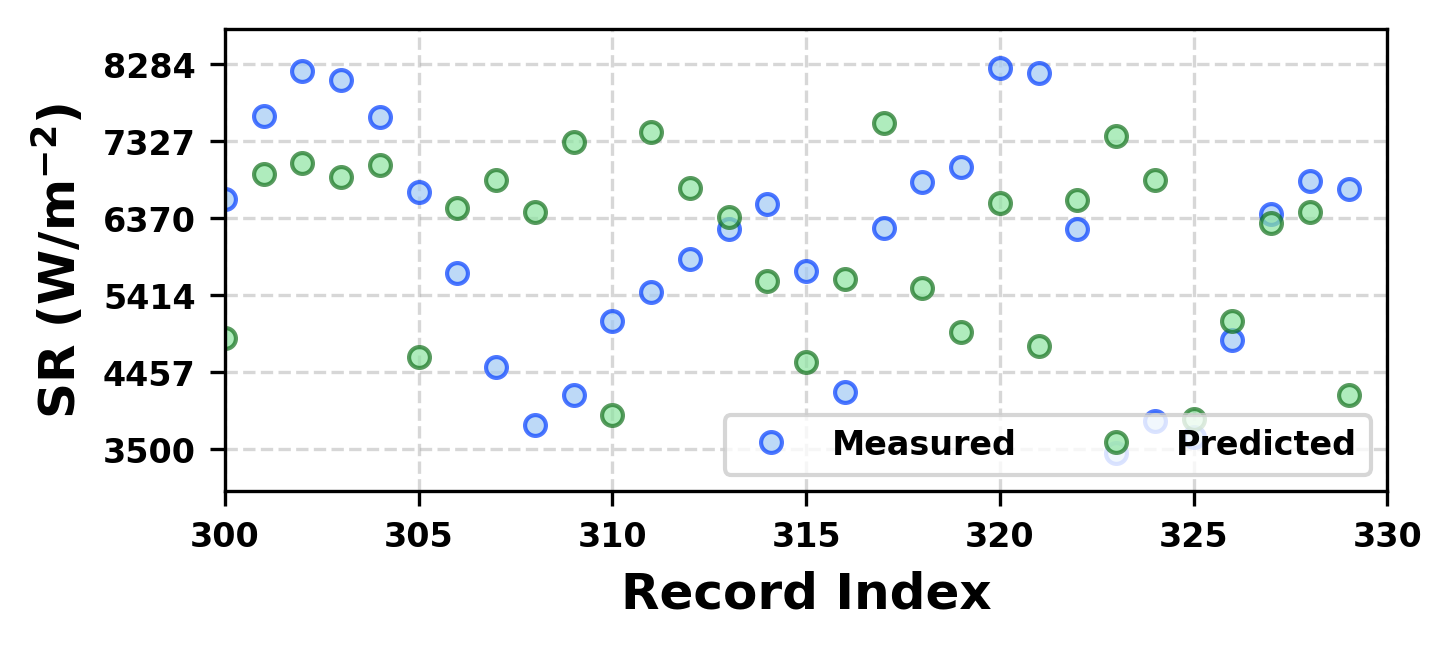

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3870.9 7547.0199999999995


In [51]:
f = plt.figure(figsize=(5, 2), dpi=300)

n_samples = min(len(y.values[300:400]), len(knn_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(knn_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(knn_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, knn_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('KNN_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(knn_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(knn_predictions[300:300 + n_samples]), max(knn_predictions[300:300 + n_samples]))


In [52]:
knn_cv_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski', p=2)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

knn_scores = cross_validate(knn_cv_model, X_train, y_train,
                            cv=10,
                            scoring=scoring_metrics,
                            return_train_score=True)

knn_rmse_scores = np.sqrt(-knn_scores['test_mse'])

print("\n=== KNN 10-Fold CV Results ===")
print(f"MAE:  {-knn_scores['test_mae'].mean():.6f} ± {knn_scores['test_mae'].std():.6f}")
print(f"MSE:  {-knn_scores['test_mse'].mean():.6f} ± {knn_scores['test_mse'].std():.6f}")
print(f"RMSE: {knn_rmse_scores.mean():.6f} ± {knn_rmse_scores.std():.6f}")
print(f"R²:   {knn_scores['test_r2'].mean():.6f} ± {knn_scores['test_r2'].std():.6f}")



=== KNN 10-Fold CV Results ===
MAE:  189.456765 ± 22.664926
MSE:  66967.999810 ± 21448.811505
RMSE: 255.890856 ± 38.572914
R²:   0.957158 ± 0.014057


In [54]:
import joblib

# Save the trained model
joblib.dump(model, 'knn_regression_model.pkl')



['knn_regression_model.pkl']

SVR

Initailization and Model Training

Training time: 0.4259 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

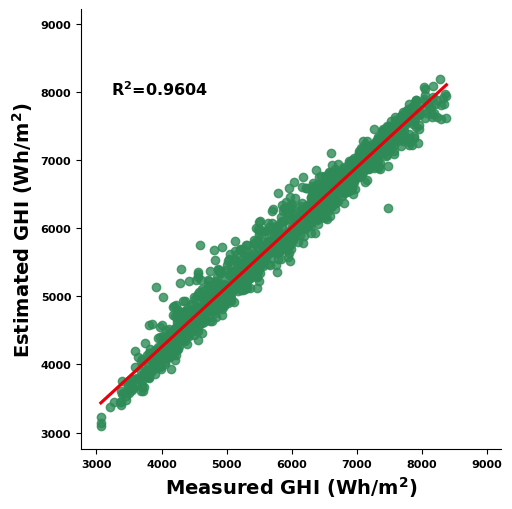

MAE: 186.64937914260184
MSE: 62621.82079390211
RMSE: 250.24352298091975
R^2: 0.9604271733922681
Pearson correlation: 0.9844971657656012


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

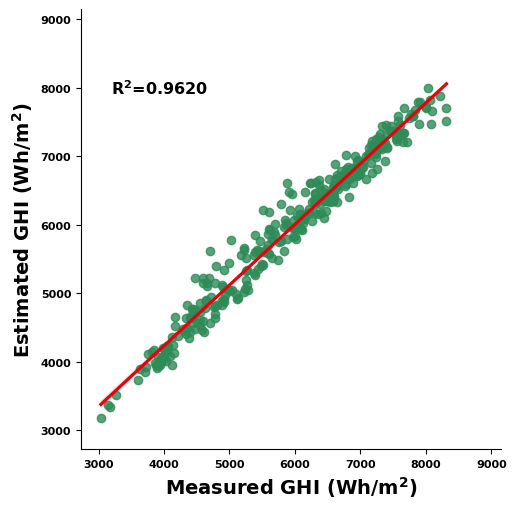

MAE: 181.82691312830713
MSE: 58089.807767535094
RMSE: 241.01827268390895
R^2: 0.9619717072715981
Pearson correlation: 0.9845408245977902
Testing time: 0.0809 sec
MAE: 181.82691312830713
MSE: 58089.807767535094
RMSE: 241.01827268390895
R² Score: 0.9619717072715981


In [55]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize SVR model (you can try other kernels too)
svr_model = SVR(
    kernel='rbf',     # Radial Basis Function kernel (default)
    C=100.0,          # Regularization parameter
    epsilon=0.1       # Epsilon in the epsilon-SVR model
)

# Training
start_time = time.time()
svr_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = svr_model.predict(X_train)
test_predictions = svr_model.predict(X_test)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'SVR', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'SVR', loc=(1.3, 1.09, 33))

plt.show()

# Testing time
t1 = time.time()
svr_predictions = svr_model.predict(X_test)
print('Testing time: {:.4f} sec'.format(time.time() - t1))

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, svr_predictions))
print("MSE:", mean_squared_error(y_test, svr_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, svr_predictions)))
print("R² Score:", r2_score(y_test, svr_predictions))


Measured vs Predicted — Scatter Plot

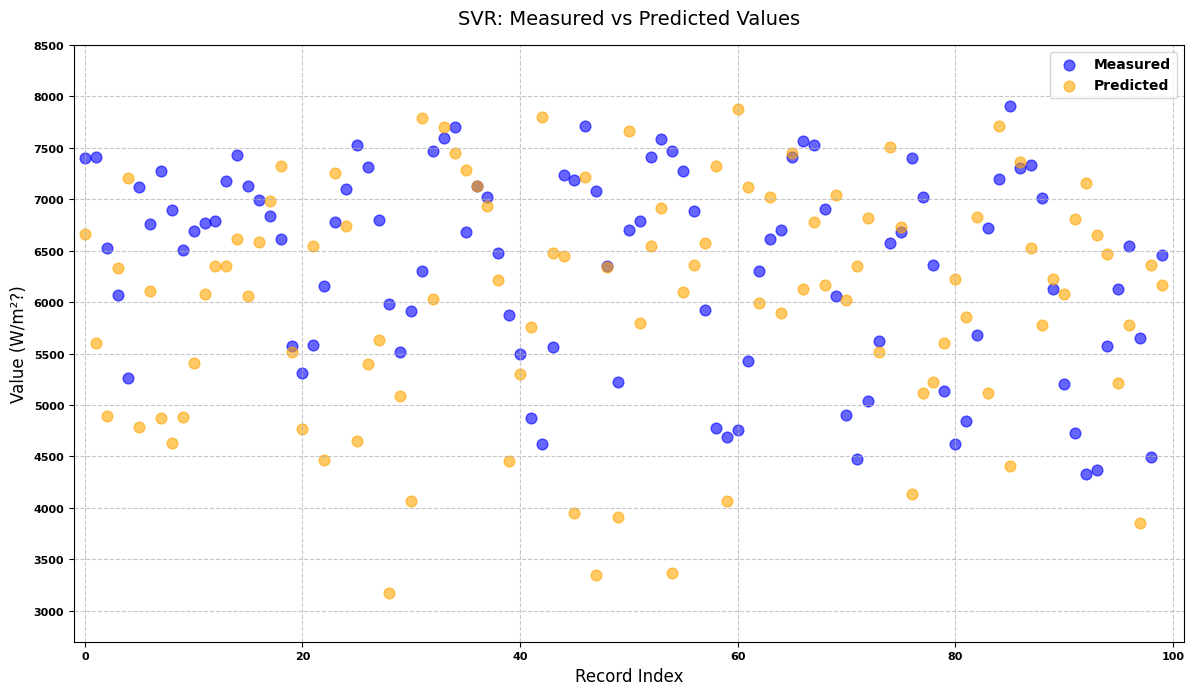

In [56]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), svr_predictions[:100], c='orange', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('SVR: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

# Custom y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('SVR_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()


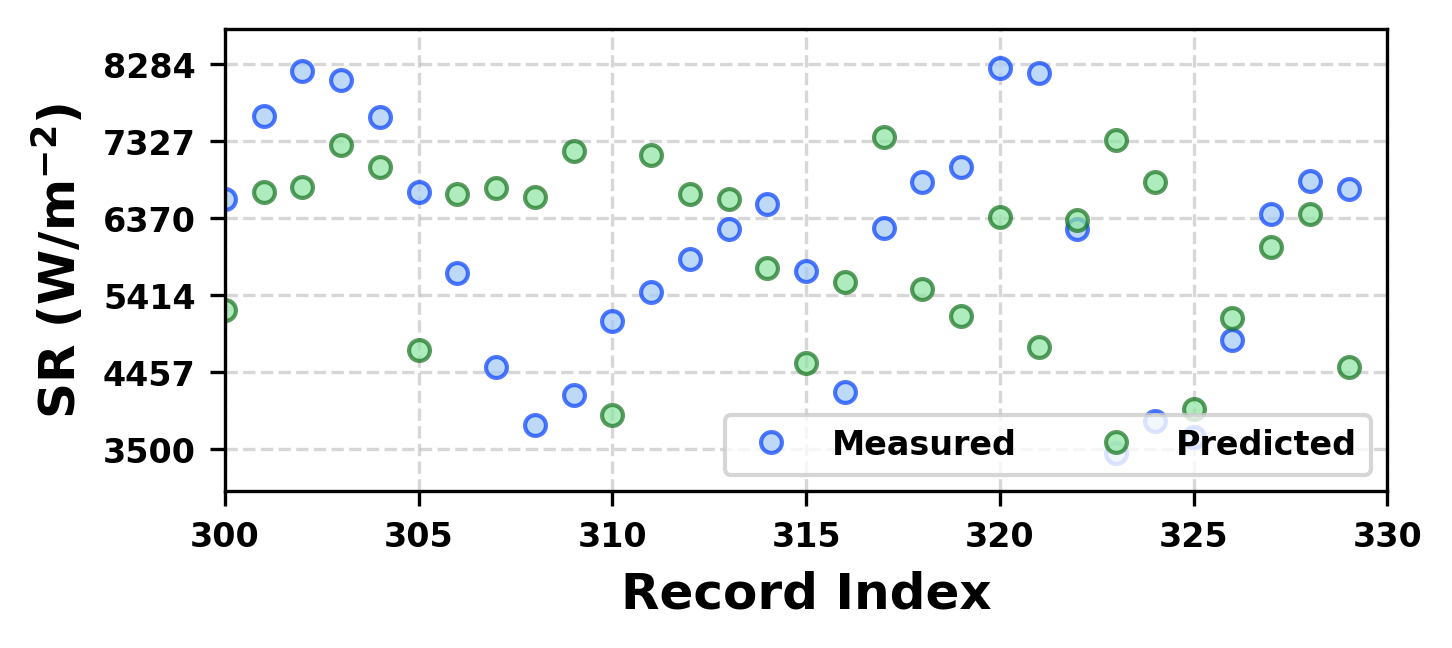

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3926.1166587544667 7374.516156235502


In [57]:
f = plt.figure(figsize=(5, 2), dpi=300)

n_samples = min(len(y.values[300:400]), len(svr_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(svr_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(svr_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, svr_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('SVR_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(svr_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(svr_predictions[300:300 + n_samples]), max(svr_predictions[300:300 + n_samples]))


In [58]:
svr_cv_model = SVR(kernel='rbf', C=100.0, epsilon=0.1)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

svr_scores = cross_validate(svr_cv_model, X_train, y_train,
                            cv=10,
                            scoring=scoring_metrics,
                            return_train_score=True)

svr_rmse_scores = np.sqrt(-svr_scores['test_mse'])

print("\n=== SVR 10-Fold CV Results ===")
print(f"MAE:  {-svr_scores['test_mae'].mean():.6f} ± {svr_scores['test_mae'].std():.6f}")
print(f"MSE:  {-svr_scores['test_mse'].mean():.6f} ± {svr_scores['test_mse'].std():.6f}")
print(f"RMSE: {svr_rmse_scores.mean():.6f} ± {svr_rmse_scores.std():.6f}")
print(f"R²:   {svr_scores['test_r2'].mean():.6f} ± {svr_scores['test_r2'].std():.6f}")



=== SVR 10-Fold CV Results ===
MAE:  200.039955 ± 19.787139
MSE:  70147.557402 ± 12508.864479
RMSE: 263.756325 ± 24.086478
R²:   0.955406 ± 0.006756


In [59]:
import joblib

# Save the trained model
joblib.dump(model, 'svr_model.pkl')



['svr_model.pkl']

XGBoost


Initialization and Model Training

Training time: 6.4869 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

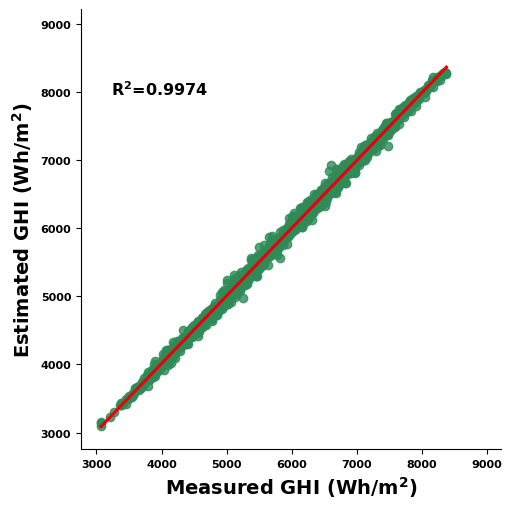

MAE: 48.609061263563774
MSE: 4086.4418453683397
RMSE: 63.92528330299632
R^2: 0.9974176404879449
Pearson correlation: 0.9987156411899472


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

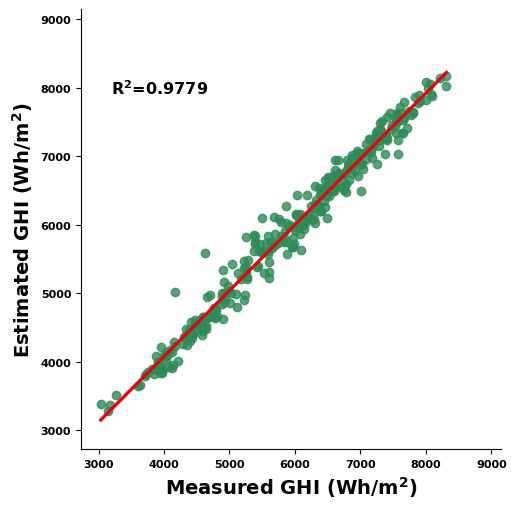

MAE: 132.82850852272725
MSE: 33686.5500795273
RMSE: 183.53896065829537
R^2: 0.9779472159288126
Pearson correlation: 0.9890843116457573
Testing time: 0.0300 sec
MAE: 132.82850852272725
MSE: 33686.5500795273
RMSE: 183.53896065829537
R² Score: 0.9779472159288126


In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

# Measure training time
start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = xgb_model.predict(X_train)
test_predictions = xgb_model.predict(X_test)

# Evaluate
evaluate(y_train, train_predictions, 'Training_data', 'XGB', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'XGB', loc=(1.3, 1.09, 33))

plt.show()

# Testing time
t1 = time.time()
xgb_predictions = xgb_model.predict(X_test)
print('Testing time: {:.4f} sec'.format(time.time() - t1))

# Evaluation Metrics
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_predictions)))
print("R² Score:", r2_score(y_test, xgb_predictions))


Measured vs Predicted — Scatter Plot

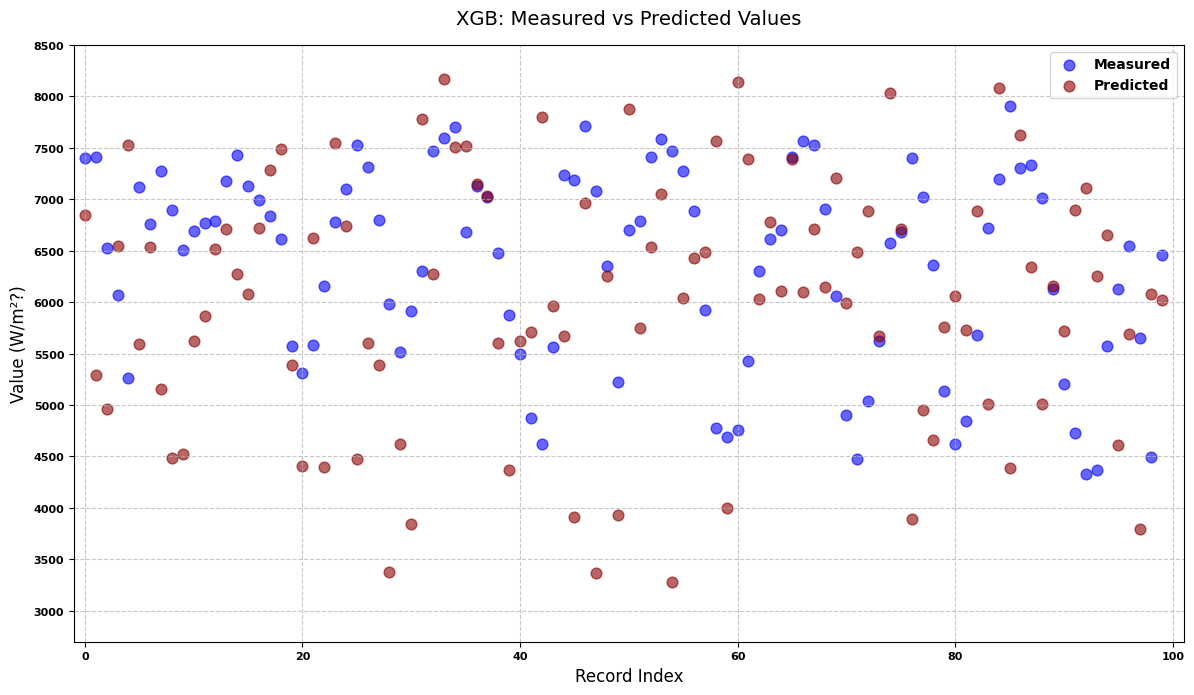

In [61]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), xgb_predictions[:100], c='darkred', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('Value (W/m²?)', fontsize=12)
plt.title('XGB: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

# Custom y-limits
data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('XGB_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()


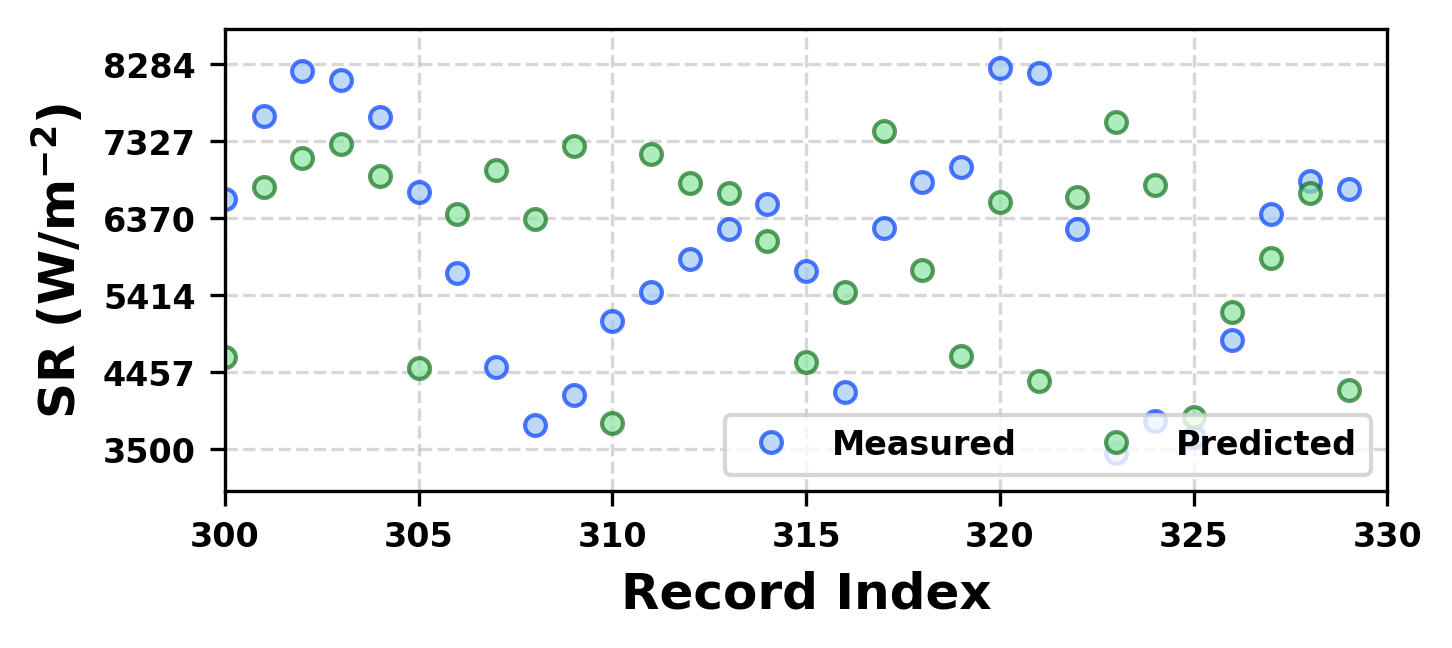

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3819.1355 7558.3784


In [62]:
f = plt.figure(figsize=(5, 2), dpi=300)

n_samples = min(len(y.values[300:400]), len(xgb_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(xgb_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(xgb_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, xgb_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)

tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('XGB_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

# Diagnostics
print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(xgb_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(xgb_predictions[300:300 + n_samples]), max(xgb_predictions[300:300 + n_samples]))


In [63]:
xgb_cv_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

xgb_scores = cross_validate(xgb_cv_model, X_train, y_train,
                            cv=10,
                            scoring=scoring_metrics,
                            return_train_score=True)

xgb_rmse_scores = np.sqrt(-xgb_scores['test_mse'])

print("\n=== XGBoost 10-Fold CV Results ===")
print(f"MAE:  {-xgb_scores['test_mae'].mean():.6f} ± {xgb_scores['test_mae'].std():.6f}")
print(f"MSE:  {-xgb_scores['test_mse'].mean():.6f} ± {xgb_scores['test_mse'].std():.6f}")
print(f"RMSE: {xgb_rmse_scores.mean():.6f} ± {xgb_rmse_scores.std():.6f}")
print(f"R²:   {xgb_scores['test_r2'].mean():.6f} ± {xgb_scores['test_r2'].std():.6f}")



=== XGBoost 10-Fold CV Results ===
MAE:  148.281024 ± 18.612209
MSE:  40118.706686 ± 11921.100849
RMSE: 198.439973 ± 27.208156
R²:   0.973990 ± 0.008628


In [65]:
import joblib

# Save the trained model
joblib.dump(model, 'XG_Boost_model.pkl')



['XG_Boost_model.pkl']

ANN

Initialization and Model Training


In [68]:
!pip install scikeras


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training time: 25.5056 seconds
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

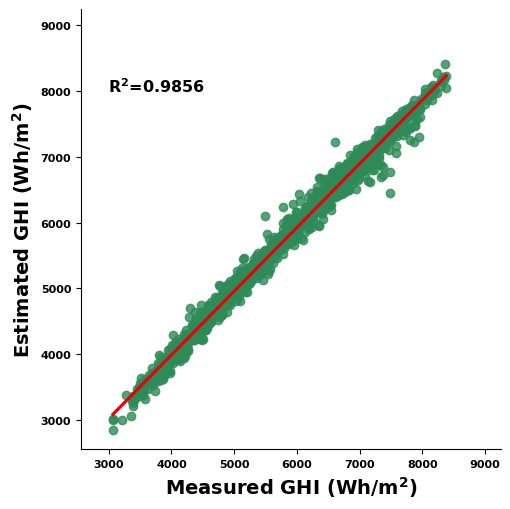

MAE: 116.02947986015683
MSE: 22827.24515170749
RMSE: 151.08687948232796
R^2: 0.9855746989967964
Pearson correlation: 0.9945251450397573


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

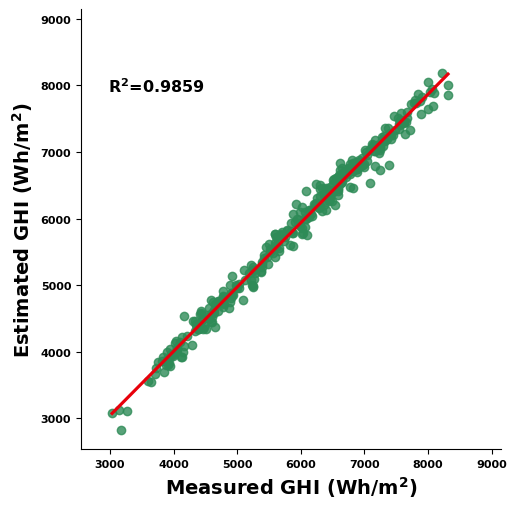

MAE: 110.73402994791667
MSE: 21535.883666560767
RMSE: 146.75109426018182
R^2: 0.9859016078773377
Pearson correlation: 0.9944404182538739


In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Define model builder
def build_ann():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

# Train ANN
ann_model = build_ann()
start_time = time.time()
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = ann_model.predict(X_train).flatten()
test_predictions = ann_model.predict(X_test).flatten()

# Evaluate visually
evaluate(y_train, train_predictions, 'Training_data', 'ANN', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'ANN', loc=(1.3, 1.09, 33))
plt.show()

Testing Time + Metrics

In [76]:
t1 = time.time()
ann_predictions = ann_model.predict(X_test).flatten()
print('Testing time: {:.4f} sec'.format(time.time() - t1))

print("MAE:", mean_absolute_error(y_test, ann_predictions))
print("MSE:", mean_squared_error(y_test, ann_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ann_predictions)))
print("R² Score:", r2_score(y_test, ann_predictions))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Testing time: 0.2630 sec
MAE: 110.73402994791667
MSE: 21535.883666560767
RMSE: 146.75109426018182
R² Score: 0.9859016078773377


Scatter Plot: Measured vs Predicted

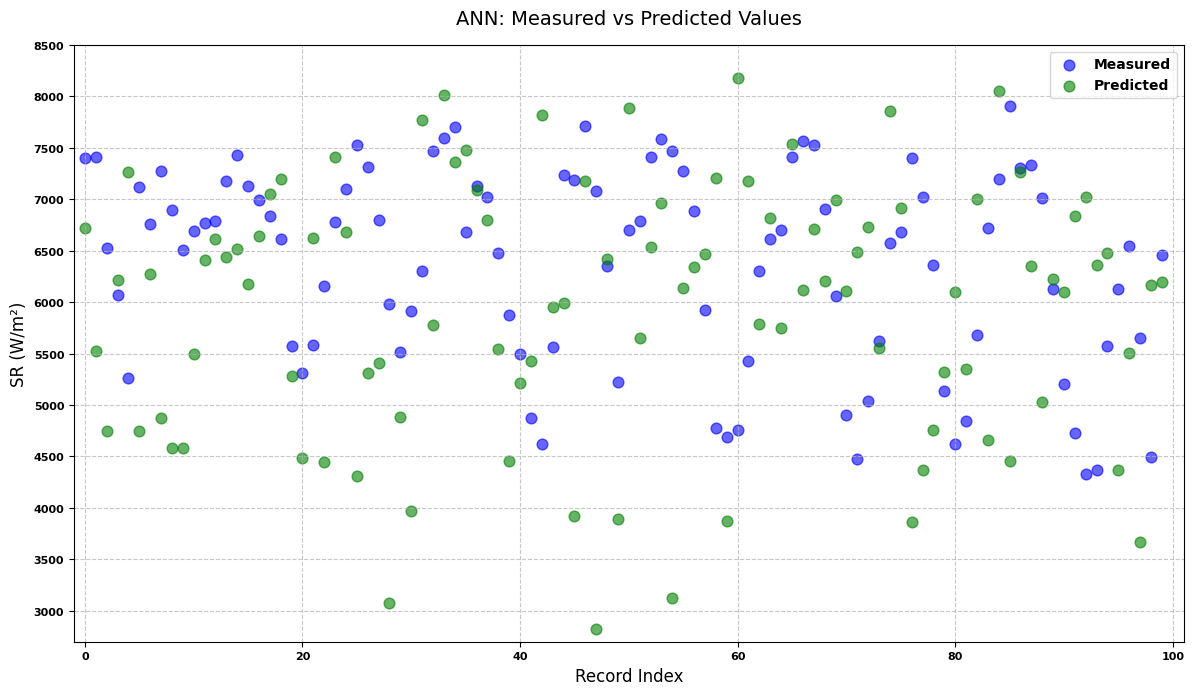

In [80]:
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), test_predictions[:100], c='green', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('SR (W/m²)', fontsize=12)
plt.title('ANN: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('ANN_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()

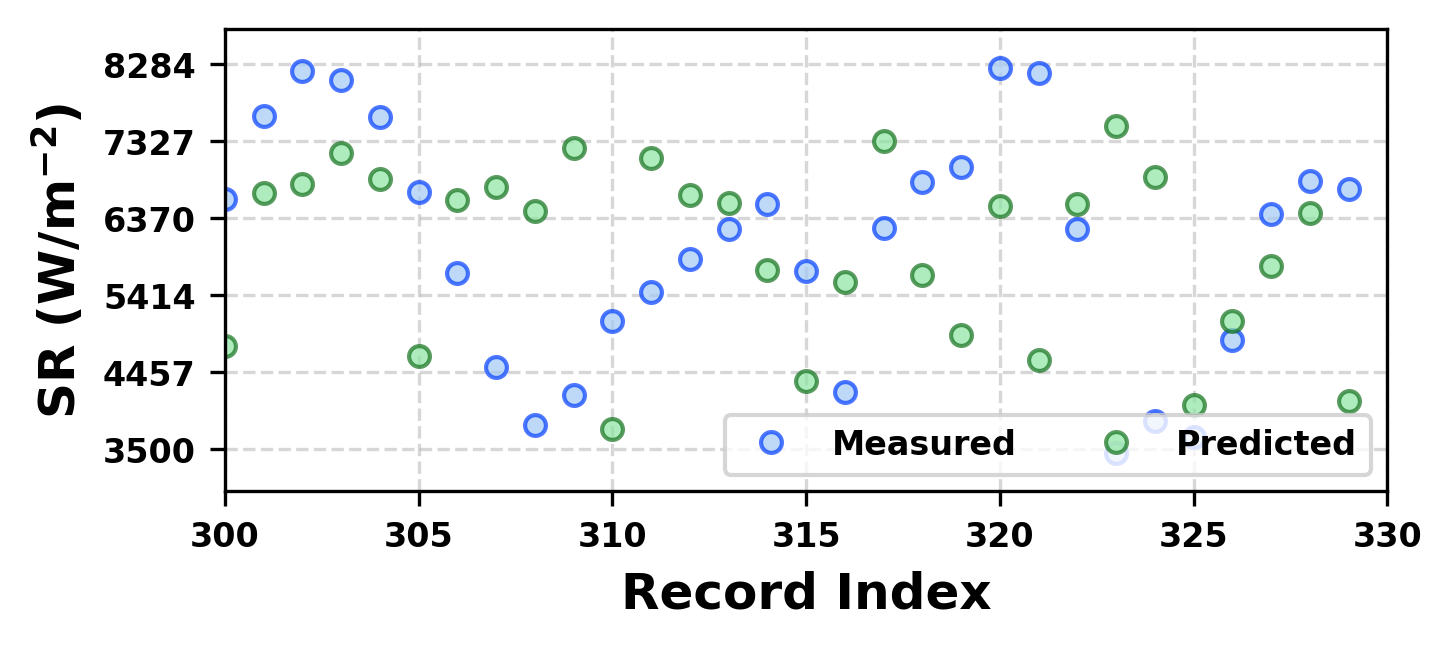

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3750.843 7516.5405


In [79]:
f = plt.figure(figsize=(5, 2), dpi=300)
n_samples = min(len(y.values[300:400]), len(test_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(test_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(test_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, test_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('ANN_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(test_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(test_predictions[300:300 + n_samples]), max(test_predictions[300:300 + n_samples]))


 Cross Validation

In [81]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores, mse_scores, r2_scores, rmse_scores = [], [], [], []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    # Build and fit the model
    ann_cv_model = build_ann()
    ann_cv_model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=32, verbose=0)

    # Predictions
    y_pred = ann_cv_model.predict(X_test_cv).flatten()

    # Evaluate and collect metrics
    mae_scores.append(mean_absolute_error(y_test_cv, y_pred))
    mse_scores.append(mean_squared_error(y_test_cv, y_pred))
    r2_scores.append(r2_score(y_test_cv, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_cv, y_pred)))

# Calculate and print average scores
print("\n=== ANN 10-Fold CV Results ===")
print(f"MAE:  {np.mean(mae_scores):.6f} ± {np.std(mae_scores):.6f}")
print(f"MSE:  {np.mean(mse_scores):.6f} ± {np.std(mse_scores):.6f}")
print(f"RMSE: {np.mean(rmse_scores):.6f} ± {np.std(rmse_scores):.6f}")
print(f"R²:   {np.mean(r2_scores):.6f} ± {np.std(r2_scores):.6f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

=== ANN 10-Fold CV Results ===
MAE:  112.761474 ± 12.128359
MSE:  25309.260773 ± 7500.759125
RMSE: 157.342531 ± 23.507208
R²:   0.983833 ± 0.004951


In [82]:
import joblib

# Save the trained model
joblib.dump(model, 'ANN_model.pkl')



['ANN_model.pkl']

###LightGBM

Initialization and Model Training

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3397
[LightGBM] [Info] Number of data points in the train set: 1319, number of used features: 55
[LightGBM] [Info] Start training from score 5901.056026
Training time: 0.2126 seconds


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

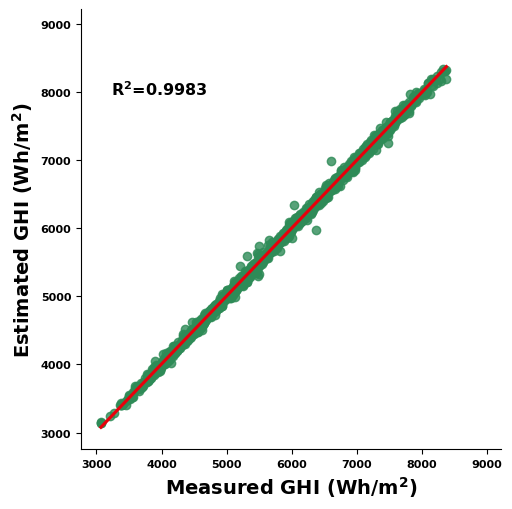

MAE: 37.234714032561925
MSE: 2624.5954450707904
RMSE: 51.23080562582234
R^2: 0.9983414302052146
Pearson correlation: 0.9991717834518872


<ipython-input-11-95a1f5c463d0>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


<Figure size 590.551x590.551 with 0 Axes>

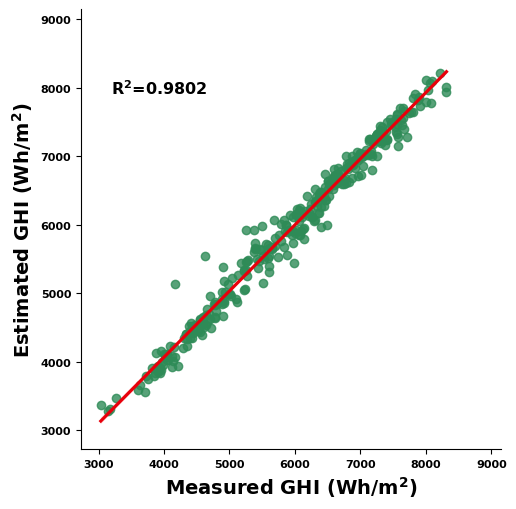

MAE: 122.36151957408786
MSE: 30174.356736671045
RMSE: 173.70767610175162
R^2: 0.9802464612128627
Pearson correlation: 0.990198654136123


In [83]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Train LightGBM
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

start_time = time.time()
lgb_model.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
train_predictions = lgb_model.predict(X_train)
test_predictions = lgb_model.predict(X_test)

# Evaluate visually
evaluate(y_train, train_predictions, 'Training_data', 'LightGBM', loc=(1.3, 1.09, 33))
evaluate(y_test, test_predictions, 'Testing_data', 'LightGBM', loc=(1.3, 1.09, 33))
plt.show()

In [84]:
# Metrics
print("MAE:", mean_absolute_error(y_test, test_predictions))
print("MSE:", mean_squared_error(y_test, test_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("R² Score:", r2_score(y_test, test_predictions))


MAE: 122.36151957408786
MSE: 30174.356736671045
RMSE: 173.70767610175162
R² Score: 0.9802464612128627


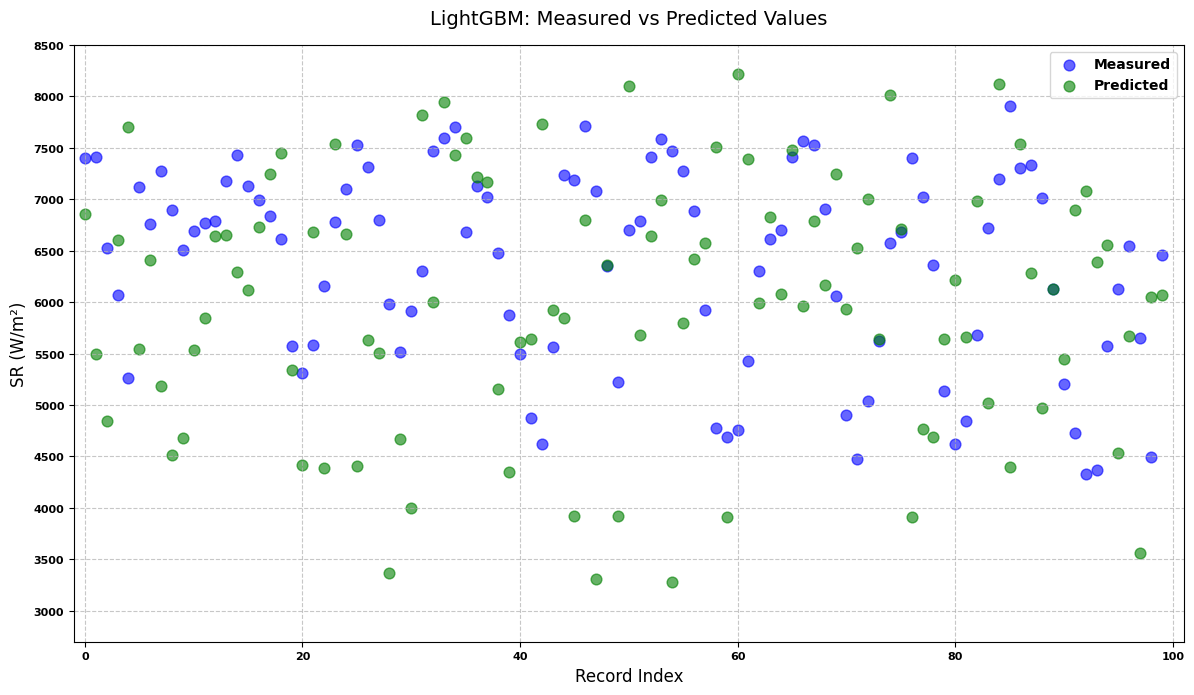

In [85]:
# Visual Comparison
plt.figure(figsize=(12, 7), dpi=100)
plt.scatter(range(100), y.values[:100], c='blue', alpha=0.6, s=60, label='Measured')
plt.scatter(range(100), test_predictions[:100], c='green', alpha=0.6, s=60, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Record Index', fontsize=12)
plt.ylabel('SR (W/m²)', fontsize=12)
plt.title('LightGBM: Measured vs Predicted Values', fontsize=14, pad=15)
plt.xlim(-1, 101)

data_min = min(3172.7, 4327.0)
data_max = max(7908.5, 7896.9)
padding = (data_max - data_min) * 0.1
plt.ylim(data_min - padding, data_max + padding)
plt.yticks(np.arange(3000, 9000, 500))

plt.legend(fontsize=10, loc='best')
plt.tight_layout()
plt.savefig('LightGBM_Training_Time.pdf', dpi=300, bbox_inches='tight', format='pdf')
plt.show()

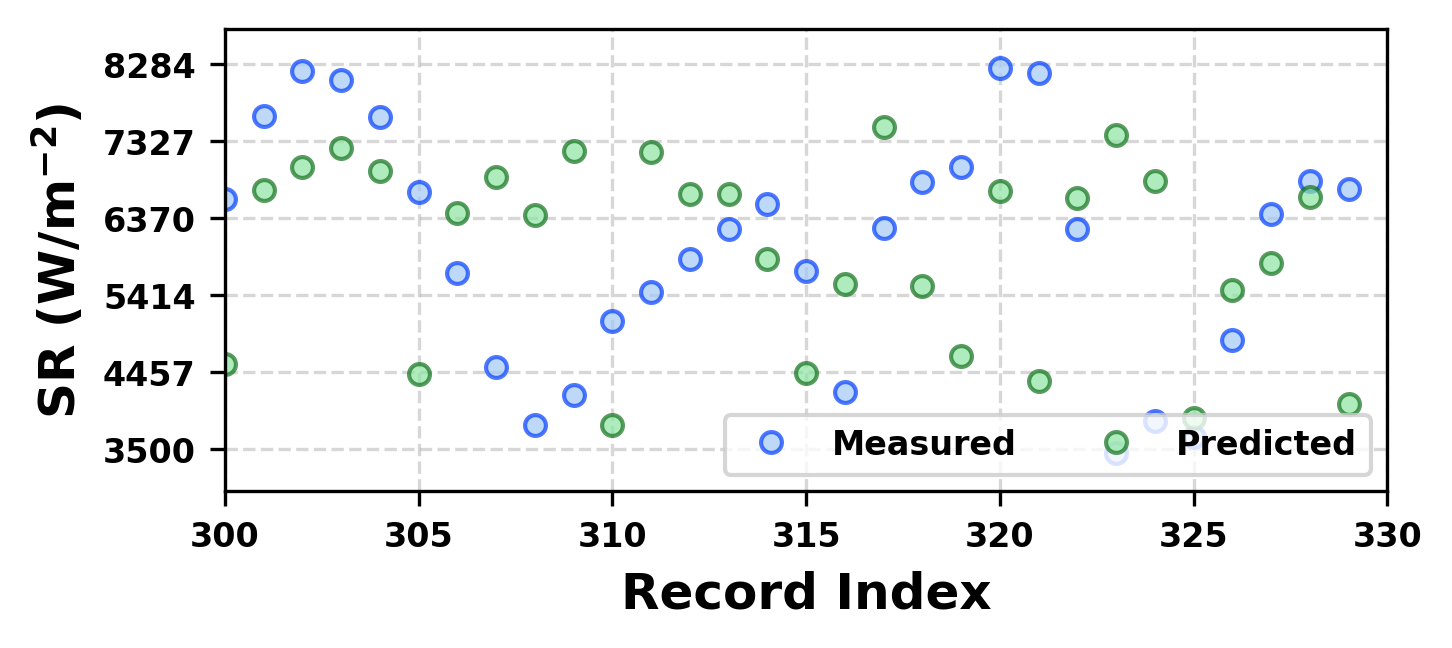

Number of measured samples: 100
Number of predicted samples: 30
Using 30 samples
y range: 3453.8 8237.7
predictions range: 3797.801929291028 7505.164797909315


In [86]:
# Detailed Plot
f = plt.figure(figsize=(5, 2), dpi=300)
n_samples = min(len(y.values[300:400]), len(test_predictions[300:400]))
x_range = range(300, 300 + n_samples)

y_min = min(min(y.values[300:300 + n_samples]), min(test_predictions[300:300 + n_samples]))
y_max = max(max(y.values[300:300 + n_samples]), max(test_predictions[300:300 + n_samples]))
y_buffer = (y_max - y_min) * 0.1

plt.plot(x_range, y.values[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[0],
         markeredgecolor=sns.color_palette("bright")[0], alpha=0.7, label='Measured')

plt.plot(x_range, test_predictions[300:300 + n_samples], linewidth=0, marker='o',
         markersize=5, markerfacecolor=sns.color_palette("pastel")[2],
         markeredgecolor=sns.color_palette("dark")[2], alpha=0.7, label='Predicted')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Record Index', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.ylabel('SR (W/m$^{-2}$)', fontsize=12, fontfamily='sans-serif', weight='bold')
plt.legend(loc='lower right', ncol=2, fontsize=8, framealpha=0.8)

plt.xlim(300, 300 + n_samples)
plt.ylim(y_min - y_buffer, y_max + y_buffer)
tick_step = (y_max - y_min) / 5
plt.yticks(np.arange(round(y_min, -2), round(y_max, -2) + tick_step, tick_step))

plt.savefig('LightGBM_Testing_Time.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()

print(f"Number of measured samples: {len(y.values[300:400])}")
print(f"Number of predicted samples: {len(test_predictions[300:400])}")
print(f"Using {n_samples} samples")
print("y range:", min(y.values[300:300 + n_samples]), max(y.values[300:300 + n_samples]))
print("predictions range:", min(test_predictions[300:300 + n_samples]), max(test_predictions[300:300 + n_samples]))


In [87]:
# 10-Fold CV using KFold manually
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores, mse_scores, r2_scores, rmse_scores = [], [], [], []

for train_idx, val_idx in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = lgb.LGBMRegressor(
        boosting_type='gbdt',
        objective='regression',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=-1,
        random_state=42
    )

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_val_cv)

    mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_scores.append(mean_squared_error(y_val_cv, y_pred_cv))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_cv, y_pred_cv)))
    r2_scores.append(r2_score(y_val_cv, y_pred_cv))

print("\n=== LightGBM 10-Fold CV Results ===")
print(f"MAE:  {np.mean(mae_scores):.6f} ± {np.std(mae_scores):.6f}")
print(f"MSE:  {np.mean(mse_scores):.6f} ± {np.std(mse_scores):.6f}")
print(f"RMSE: {np.mean(rmse_scores):.6f} ± {np.std(rmse_scores):.6f}")
print(f"R²:   {np.mean(r2_scores):.6f} ± {np.std(r2_scores):.6f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 1187, number of used features: 54
[LightGBM] [Info] Start training from score 5899.901518
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3384
[LightGBM] [Info] Number of data points in the train set: 1187, number of used features: 54
[LightGBM] [Info] Start training from score 5879.504716
[LightGBM] [Warning] Fou

In [95]:
import joblib

# Save the trained model
joblib.dump(model, 'LightGBM_model.pkl')



['LightGBM_model.pkl']

###MODEL COMPARISON


=== Model Performance Summary ===

            Model    MAE  MAE Std       MSE  MSE Std   RMSE  RMSE Std     R2  R2 Std  Training Time (s)
              ANN 112.76    12.13  25309.26  7500.76 157.34     23.51 0.9838  0.0050            25.5056
         LightGBM 137.06    10.52  35259.38  6065.84 187.11     15.74 0.9775  0.0039             0.2126
Linear Regression 128.69    10.98  35046.51 18633.15 182.32     42.51 0.9770  0.0139             0.2836
          XGBoost 148.28    18.61  40118.71 11921.10 198.44     27.21 0.9740  0.0086             6.4869
    Random Forest 170.27    24.63  55289.94 16973.88 232.58     34.56 0.9641  0.0124             5.5212
              KNN 189.46    22.66  66968.00 21448.81 255.89     38.57 0.9572  0.0141             0.0078
              SVR 200.04    19.79  70147.56 12508.86 263.76     24.09 0.9554  0.0068             0.4259
    Decision Tree 309.77    40.45 200800.60 55441.82 443.59     63.47 0.8728  0.0308             0.0521


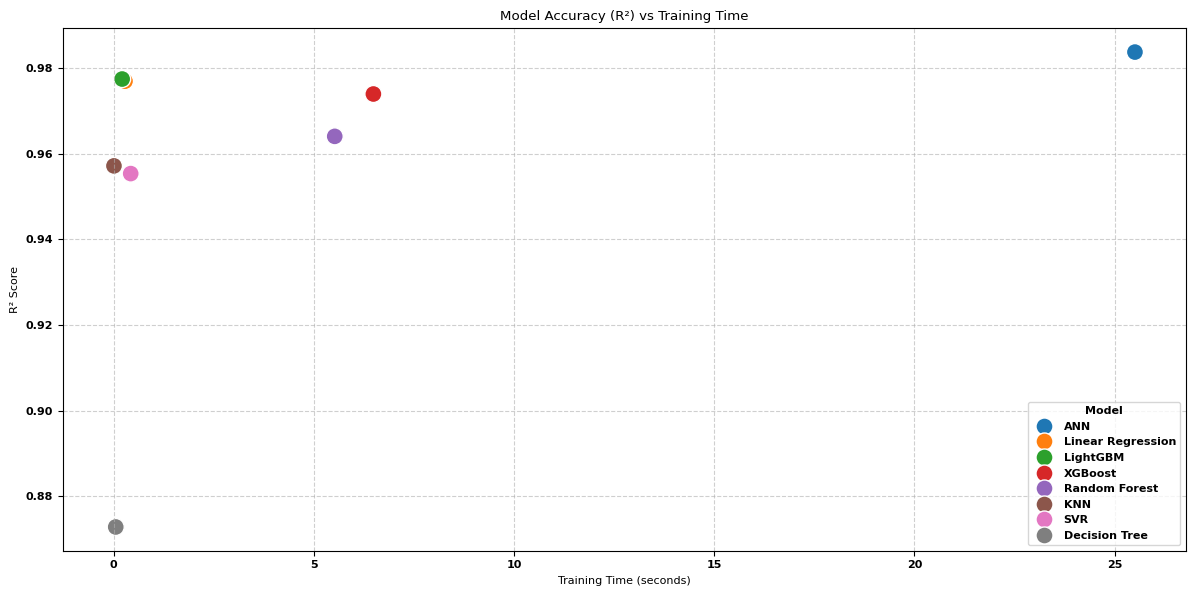

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the summary dictionary
model_summary = {
    "Model": [
        "ANN", "Linear Regression", "LightGBM", "XGBoost",
        "Random Forest", "KNN", "SVR", "Decision Tree"
    ],
    "MAE": [112.76, 128.69, 137.06, 148.28, 170.27, 189.46, 200.04, 309.77],
    "MAE Std": [12.13, 10.98, 10.52, 18.61, 24.63, 22.66, 19.79, 40.45],
    "MSE": [25309.26, 35046.51, 35259.38, 40118.71, 55289.94, 66968.00, 70147.56, 200800.60],
    "MSE Std": [7500.76, 18633.15, 6065.84, 11921.10, 16973.88, 21448.81, 12508.86, 55441.82],
    "RMSE": [157.34, 182.32, 187.11, 198.44, 232.58, 255.89, 263.76, 443.59],
    "RMSE Std": [23.51, 42.51, 15.74, 27.21, 34.56, 38.57, 24.09, 63.47],
    "R2": [0.9838, 0.9770, 0.9775, 0.9740, 0.9641, 0.9572, 0.9554, 0.8728],
    "R2 Std": [0.005, 0.0139, 0.0039, 0.0086, 0.0124, 0.0141, 0.0068, 0.0308],
    "Training Time (s)": [25.5056, 0.2836, 0.2126, 6.4869, 5.5212, 0.0078, 0.4259, 0.0521]
}

# Create DataFrame
summary_df = pd.DataFrame(model_summary)

# Sort by R2 descending
summary_df_sorted = summary_df.sort_values(by="R2", ascending=False)

# Display table
print("\n=== Model Performance Summary ===\n")
print(summary_df_sorted.to_string(index=False))

# Optional: Plot R² vs Training Time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=summary_df, x="Training Time (s)", y="R2", hue="Model", s=150)
plt.title("Model Accuracy (R²) vs Training Time")
plt.xlabel("Training Time (seconds)")
plt.ylabel("R² Score")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


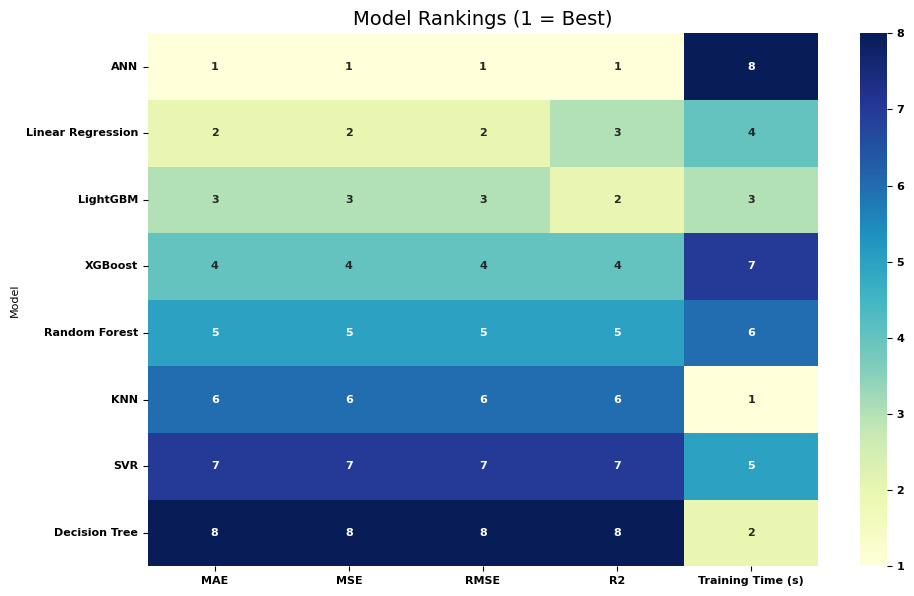

In [91]:
import numpy as np

# Invert metrics where lower is better (MAE, MSE, RMSE, Training Time)
ranked_df = summary_df.copy()
metrics_to_rank = ["MAE", "MSE", "RMSE", "Training Time (s)"]
for col in metrics_to_rank:
    ranked_df[col] = ranked_df[col].rank(ascending=True)

# For R², higher is better
ranked_df["R2"] = ranked_df["R2"].rank(ascending=False)

# Only ranks
heatmap_data = ranked_df.set_index("Model")[["MAE", "MSE", "RMSE", "R2", "Training Time (s)"]]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True, fmt=".0f")
plt.title("Model Rankings (1 = Best)", fontsize=14)
plt.tight_layout()
plt.savefig("Model_Rankings_Heatmap.png", dpi=300, bbox_inches="tight")
plt.savefig("Model_Rankings_Heatmap.pdf", dpi=300, bbox_inches="tight")
plt.show()


<ipython-input-94-d897811868ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df_sorted, x="Model", y="R2", palette="crest")


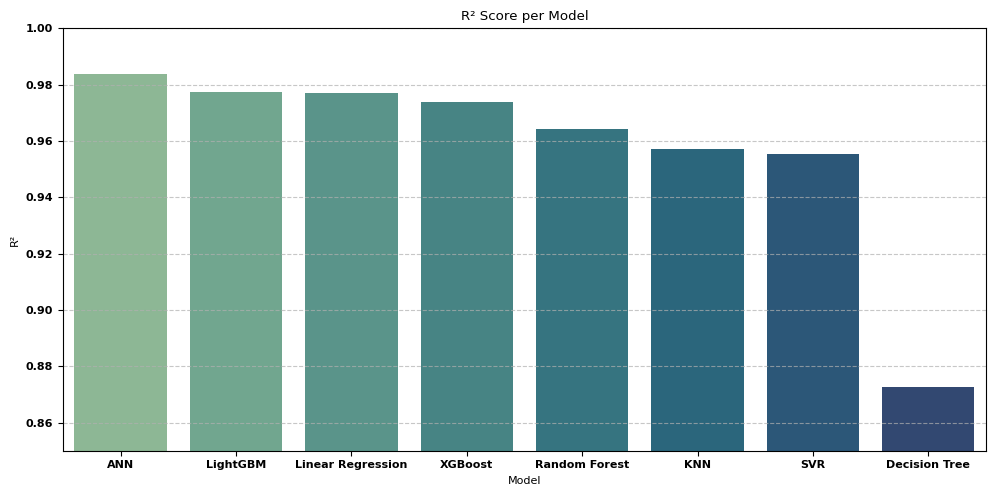

<ipython-input-94-d897811868ba>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df_sorted, x="Model", y="Training Time (s)", palette="mako")


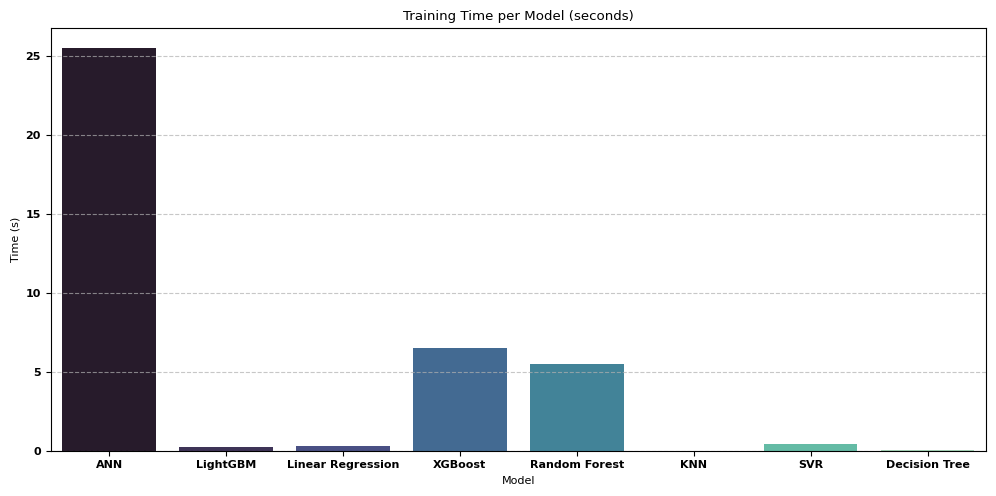

In [94]:
# Bar Plot for R² Score
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_df_sorted, x="Model", y="R2", palette="crest")
plt.title("R² Score per Model")
plt.ylabel("R²")
plt.ylim(0.85, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("R2_Score_Per_Model.png", dpi=300, bbox_inches="tight")
plt.savefig("R2_Score_Per_Model.pdf", dpi=300, bbox_inches="tight")
plt.show()


# Bar Plot for Training Time
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_df_sorted, x="Model", y="Training Time (s)", palette="mako")
plt.title("Training Time per Model (seconds)")
plt.ylabel("Time (s)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Training_Time_Per_Model.png", dpi=300, bbox_inches="tight")
plt.savefig("Training_Time_Per_Model.pdf", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# Step 1: Install and import necessary libraries
!pip install numpy scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 2: Prepare the input data (same as provided in the website screenshot)
# Features: DNI, Air Temperature, Wind Speed, Relative Humidity, Barometric Pressure, DHI
input_data = np.array([
    [6223.12, 30.25, 3.59, 21.77, 927.85, 2344.29]  # Single row of input data
])

# Step 3: Define or load your linear regression model
# Option 1: If you have a saved model (e.g., 'model.pkl'), load it
# from sklearn.externals import joblib  # Uncomment if using older scikit-learn
# import joblib
# model = joblib.load('model.pkl')

# Option 2: If you want to test with a new model, train it (you'll need training data)
# For this example, I'll assume you have training data (replace with your actual data)
# Example training data (you should replace this with your dataset)
# X_train = np.array([[DNI_values], [Temp_values], ...])  # Shape: (n_samples, 6)
# y_train = np.array([GHI_values])  # Shape: (n_samples,)
# model = LinearRegression()
# model.fit(X_train, y_train)

# For this demo, let's create a dummy model with random coefficients to test the pipeline
# Note: Replace this with your actual trained model or training data
model = LinearRegression()
# Dummy coefficients (replace with your model's coefficients)
model.coef_ = np.array([0.5, 0.1, 0.05, 0.02, 0.01, 0.3])  # Example coefficients
model.intercept_ = 1000  # Example intercept

# Step 4: Make a prediction
predicted_GHI = model.predict(input_data)

# Step 5: Print the result
print(f"Predicted GHI: {predicted_GHI[0]:.2f} Wh/m²")
print(f"Website Predicted GHI: 6091.30 Wh/m²")

# Step 6: Compare and debug (optional)
difference = abs(predicted_GHI[0] - 6091.30)
print(f"Difference from website prediction: {difference:.2f} Wh/m²")
if difference > 1.0:  # Threshold for significant difference
    print("Warning: There might be a discrepancy between the model and website!")

Predicted GHI: 4827.77 Wh/m²
Website Predicted GHI: 6091.30 Wh/m²
Difference from website prediction: 1263.53 Wh/m²
